<a href="https://colab.research.google.com/github/yudisdc1/Portofolio/blob/main/Data%20Mining%20Health%20Conditions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROJECT UAS DATA MINING Kelompok 7
Anggota Kelompok 7
- Yudistira Dwi Cahya 2006530942
 * Melakukan Preprocessing data :
   1. Menangani Missing Value
   2. Menangani Outliers
 * Membuat Subset Data
 * Melakukan Renaming pada data_riwayatpenyakit
 * Melakukan Visualisasi data_status, dan kasus data diabetes
- Michael Rich 2106724901
 * Melakukan Preprocessing data
 * Melakukan Encoding pada data_riwayatpenyakit
 * Melakukan Encoding pada data_kondisi
 * Melakukan Renaming pada data_kondisi, data_lingkungan, data_mental
- Raqi Akbar Robbani 2106652562
 * Melakukan Eksplorasi dan Visualisasi data
 * Melakukan Encoding pada data_mental
 * Melakukan visualisasi pada data_riwayatpenyakit, data_mental, data_status, data_lingkungan, dan data_kondisi
- Faza Ilmiyah 2106638620
 * Melakukan Preprocessing untuk data
 * Melakukan Clustering Analysis
 * Melakukan Data Mining dan menghasilkan insight
- Bob Rahman Hakim 2106726863
 * Melakukan Data Mining
 * Menghasilkan insight


___
[ UAS Data Mining Prodi Statistika UI  - Ganjil 2023 ]

Ketentuan Umum:
* UAS dilakukan via project
* Dikerjakan berkelompok, kelompok Tentukan sendiri dengan jumlah kelompok Minimal 4, Maximal 5

Data: https://drive.google.com/file/d/1BbPJGIWhQg-pfVlb6hHze95fLe6U61kF/view?usp=sharing

* Task:
 * A. Lakukan Proses Mining pada Data yang diberikan.
 * B. Dari hasil A ada informasi/insight apa saja dari data yang bisa didapatkan.
  * C Buat sebuah laporan/presentasi dari hasil B.

*  UAS dikumpulkan via email ke dosen masing-masing kelas. Periksa Sent Folder setelah mengirim. Kesalahan menulis email dan keterlambatan = pengurangan nilai.
* Subject: UAS Data Mining Ganjil 2023 -
* Isi Email:
	* Link ke Youtube video presentasi (unlisted) Video Max 7 menit.
	* Nama dan Nomer Mahasiswa seluruh Anggota
	* Peran dari masing-masing anggota
* Lampiran Email:
	* Laporan dalam bentuk ipynb: Code dan narasi
	* PPT yang digunakan untuk membuat video presentasi
* Deadline pengiriman laporan *Jum'at, 22 Desember 2023 jam 23.59 WIB*

## Load Data & EDA

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

In [ ]:
import os
import pandas as pd

file_path = 'data_kesehatan-Mental-SRQ-2023--Filtered.xlsx'

# Memeriksa apakah file sudah ada di Google Colab
if not os.path.exists(file_path):
    # Jika file tidak ada, unduh dari URL
    url = "https://github.com/yudisdc/DataMining/raw/main/data_kesehatan-Mental-SRQ-2023--Filtered.xlsx"
    data = pd.read_excel(url)
     # Menyimpan data yang sudah diunduh ke file di Google Colab
    data.to_excel(file_path, index=False)
else:
    # Jika file sudah ada, baca langsung dari file
    data = pd.read_excel(file_path)

# Tampilkan beberapa baris pertama dari data untuk memastikan file telah terbaca dengan benar
data.head()


,ID,WILAYAH,JENIS KELAMIN,USIA,LAMA BERDINAS,PENDIDIKAN TERAKHIR,TINGGI BADAN,BERAT BADAN,LINGKAR PINGGANG,Status Perkawinan,...,Sumber air bersih di tempat tinggal saudara ?,Penggunaan air bersih untuk makan & minum bersumber dari :,Berapa jarak jamban dengan sumur dirumah saudara ?,Bagaimana saluran pembuangan air (sanitasi) rumah tangga?,Apakah terdapat tempat sampah di sekitar rumah?,Berapa jarak tempat sampah dengan rumah saudara ?,Apakah di sekitar tempat tinggal Saudara tersedia fasilitas umum (fasum) untuk kegiatan/aktivitas olah raga?,Kelompok Umur,NILAI IMT,IMT
0,1,KALBAR,LAKI - LAKI,34.0,16.0,SMA,168.9,85.0,100.0,Menikah,...,Air PAM,Tadah hujan,Lebih dari 12 meter,Ada,"Ada, terbuka",Lebih dari 10 meter,Tidak ada,25 - 34,29.796114,Obesitas
1,2,KALBAR,LAKI - LAKI,43.0,23.0,SMA,169.5,70.0,80.0,Menikah,...,Air PAM,Air mineral isi ulang,Lebih dari 12 meter,Ada,"Ada, tertutup",Lebih dari 10 meter,Tidak ada,35 - 44,24.364563,Normal
2,3,KALBAR,LAKI - LAKI,21.0,1.0,SMA,169.5,60.0,78.0,Belum Menikah,...,Air PAM,Air mineral isi ulang,Tidak memiliki jamban sehat,Ada,Tidak ada,NaN,Tidak ada,15 - 24,20.883912,Normal
3,4,KALBAR,LAKI - LAKI,40.0,23.0,S2,166.8,80.0,34.0,Menikah,...,Air PAM,Air mineral isi ulang,Tidak memiliki jamban sehat,Ada,"Ada, tertutup",Lebih dari 10 meter,Tidak ada,35 - 44,28.753975,Obesitas
4,5,KALBAR,LAKI - LAKI,28.0,9.0,SMA,164.5,62.0,32.0,Menikah,...,Air PAM,Air mineral isi ulang,Lebih dari 12 meter,Ada,"Ada, tertutup",Lebih dari 10 meter,Ada,25 - 34,22.911836,Normal


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289801 entries, 0 to 289800
Data columns (total 79 columns):
 #   Column                                                                                                             Non-Null Count   Dtype  
---  ------                                                                                                             --------------   -----  
 0   ID                                                                                                                 289801 non-null  int64  
 1   WILAYAH                                                                                                            289801 non-null  object 
 2   JENIS KELAMIN                                                                                                      289801 non-null  object 
 3   USIA                                                                                                               289801 non-null  float64
 4   LAMA BERDINAS 

___
Dapat dilihat bahwa variabel 'TINGGI BADAN' bertipekan Object, akan dilihat isi dari variabelnya dan selanjutnya akan diubah menjadi tipe data float, dan juga mengubah tipe data object menjadi kategorik

In [ ]:
data['TINGGI BADAN'].unique()

array([168.9, 169.5, 166.8, 164.5, 165.5, 168.5, 175, 172.5, 166.5, 166,
       172, 167, 175.8, 163.5, 167.8, 72.5, 168.8, 174.5, 161, 172.6,
       160.5, 175.5, 171.5, 17, 165, 170, 150, 165.9, 156, 168, 167.5,
       166.3, 159.5, 169, 173.5, 171, 1.65, 166.9, 176.5, 1.71, 166.6,
       1.76, 171.3, 156.5, 157.5, '17,1 ', 160, 1.75, 1.66, 1.72, 1.68,
       162.5, '17,5', 177.5, 169.2, 178, 176, 180.5, '16,6', 1.7, 178.5,
       167.2, 171.8, 170.3, 165.4, 1.69, 173.4, 170.2, '15,5', 182, 158.5,
       185.5, 158, 164.4, 165.7, 167.6, 1.64, 161.5, 179.5, 165.58, 169.7,
       168.2, 1.77, 173, 170.5, '17,6', 163, '16,7', 164, 171.6, 176.6,
       16.39, 188.5, 173.8, 172.8, 164.7, 155, 174.8, 168.58, 5, 174, 153,
       180, 181, 16, 177, 162, 159, 187, 15, 179, 185, 151, 157, 18, 152,
       26, 20, 148, 154, 19, 72, 23, 30, 29, 32, 33, 35, 39, 38, 65, 63,
       67, 68, 69, 71, 70, 45, 46, 76, 75, 53, 183, 78, 80, 55, 57, 60,
       84, 62, 66, 59, 56, 145, 64, 54, 74, 73, 61, 79

___
Terlihat bahwa ada beberapa data yang mengandung "," selanjutnya akan diganti menjadi "."

In [ ]:
data['TINGGI BADAN'] = data['TINGGI BADAN'].apply(lambda x: x.replace(',', '.') if isinstance(x, str) and ',' in x else x)

In [ ]:
#Mengubah data kolom Tinggi Badan menjadi tipe data Float
data['TINGGI BADAN'] = data['TINGGI BADAN'].astype(float)

#Mengubah data kolom yang bertipe Object menjadi tipe data Kategorik
obj_columns = data.select_dtypes(exclude='number').columns
data[obj_columns] = data[obj_columns].astype('category')

In [ ]:
data.dtypes

ID                                                                                                                 int64
WILAYAH                                                                                                         category
JENIS KELAMIN                                                                                                   category
USIA                                                                                                             float64
LAMA BERDINAS                                                                                                    float64
                                                                                                                  ...   
Berapa jarak tempat sampah dengan rumah saudara ?                                                               category
Apakah di sekitar tempat tinggal Saudara tersedia fasilitas umum (fasum) untuk kegiatan/aktivitas olah raga?    category
Kelompok Umur                   

In [ ]:
data.columns.unique()

Index(['ID', 'WILAYAH', 'JENIS KELAMIN', 'USIA', 'LAMA BERDINAS',
       'PENDIDIKAN TERAKHIR', 'TINGGI BADAN', 'BERAT BADAN',
       'LINGKAR PINGGANG', 'Status Perkawinan', 'PENGELUARAN/BULAN',
       'Apakah saudara pernah di diagnosa atau menderita penyakit Jantung ?',
       'Apakah saudara pernah di diagnosa atau menderita penyakit Stroke ?',
       'Apakah saudara pernah di diagnosa atau menderita penyakit Diabetes Melitus ?',
       'Apakah saudara pernah di diagnosa atau menderita penyakit Hipertensi ?',
       'Apakah saudara pernah di diagnosa atau menderita penyakit Kanker ?',
       'Apakah saudara pernah di diagnosa atau menderita penyakit Ginjal ?',
       'Apakah saudara pernah di diagnosa atau menderita penyakit Tumor ?',
       'Apakah saudara pernah di diagnosa atau menderita penyakit Osteoartritis ?',
       'Apakah saudara pernah di diagnosa atau menderita penyakit Lambung ?',
       'Apakah saudara pernah di diagnosa atau menderita penyakit Liver ?',
       'Apaka

In [ ]:
data.duplicated().sum()

0

In [ ]:
#Drop Kolom ID, sebab data tidak memiliki duplikasi
data.drop(columns=['ID'], inplace=True)

In [ ]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
USIA,289801.0,431.725080,75514.913816,15.000000,29.00000,38.000000,44.000000,2.309198e+07
LAMA BERDINAS,289801.0,598.438964,120162.165443,0.000000,9.00000,18.000000,23.000000,3.101201e+07
TINGGI BADAN,289801.0,169.270241,7.678521,1.640000,167.00000,170.000000,172.000000,1.799000e+03
BERAT BADAN,289801.0,96.176577,887.911773,1.000000,66.00000,72.000000,80.000000,9.021000e+04
LINGKAR PINGGANG,289801.0,65.558079,188.430313,-75.000000,36.00000,73.000000,84.000000,1.000000e+05
NILAI IMT,289794.0,50.528637,2100.095194,0.367309,23.30668,25.099502,27.548209,3.188776e+05


In [ ]:
data['Kelompok Umur'].unique()

['25 - 34', '35 - 44', '15 - 24', '45 - 54', '55 - 64', '≥ 65']
Categories (6, object): ['15 - 24', '25 - 34', '35 - 44', '45 - 54', '55 - 64', '≥ 65']

In [ ]:
data.isna().sum().sort_values(ascending=False).head(10)

Jika Ya berapa jumlah gigi saudara yang Karies                  223744
Jika Ya, Berapa Batang Saudara merokok dalam sehari?            152543
Berapa jarak tempat sampah dengan rumah saudara ?                41649
Berapa lama saudara menggosok gigi ?                              1779
IMT                                                                  7
NILAI IMT                                                            7
Pekerjaan anda sehari – hari terganggu ?                             0
Tidak mampu melakukan hal – hal yang bermanfaat dalam hidup?         0
Kehilangan minat pada berbagai hal ?                                 0
Tidak merasa berharga?                                               0
dtype: int64

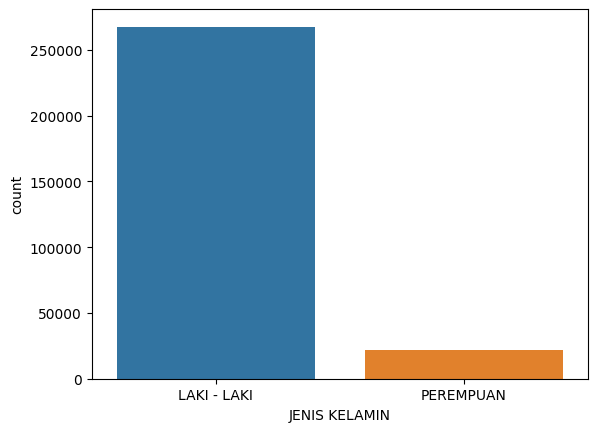

In [ ]:
sns.countplot(x = data['JENIS KELAMIN'])
plt.show()

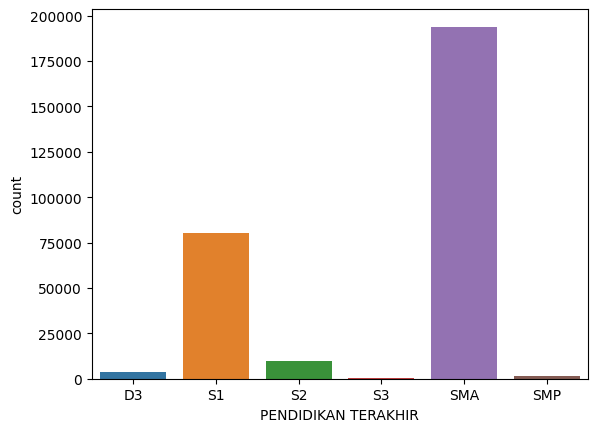

In [ ]:
sns.countplot(x = data['PENDIDIKAN TERAKHIR'])
plt.show()

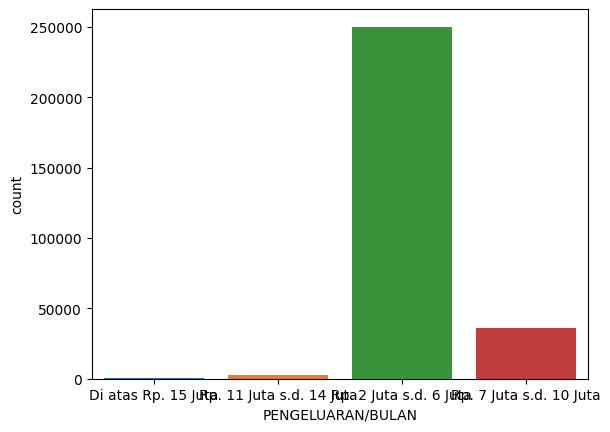

In [ ]:
sns.countplot(x = data['PENGELUARAN/BULAN'])
plt.show()

In [ ]:
data['Berapa lama saudara menggosok gigi ?'].unique()

['1 - 2 menit', 'Di atas 3 menit', 'Di bawah 1 menit', NaN]
Categories (3, object): ['1 - 2 menit', 'Di atas 3 menit', 'Di bawah 1 menit']

## PreProcessing

### Missing Value

___
**Ingin dicari kolom mana saja yang memiliki missing value, dan berapa jumlah missing value dalam kolom tersebut**

In [ ]:
data.isna().sum().sort_values(ascending=False).head(10)

Jika Ya berapa jumlah gigi saudara yang Karies                  223744
Jika Ya, Berapa Batang Saudara merokok dalam sehari?            152543
Berapa jarak tempat sampah dengan rumah saudara ?                41649
Berapa lama saudara menggosok gigi ?                              1779
IMT                                                                  7
NILAI IMT                                                            7
Pekerjaan anda sehari – hari terganggu ?                             0
Tidak mampu melakukan hal – hal yang bermanfaat dalam hidup?         0
Kehilangan minat pada berbagai hal ?                                 0
Tidak merasa berharga?                                               0
dtype: int64

___
**Terdapat 6 kolom yang memiliki missing value, dengan jumlah yang tertera, selanjutnya ingin dilihat tipe dari data variabel tersebut**

In [ ]:
data[['Jika Ya berapa jumlah gigi saudara yang Karies','Jika Ya, Berapa Batang Saudara merokok dalam sehari?','Berapa jarak tempat sampah dengan rumah saudara ?', 'Berapa lama saudara menggosok gigi ?', 'IMT', 'NILAI IMT']].dtypes

Jika Ya berapa jumlah gigi saudara yang Karies          category
Jika Ya, Berapa Batang Saudara merokok dalam sehari?    category
Berapa jarak tempat sampah dengan rumah saudara ?       category
Berapa lama saudara menggosok gigi ?                    category
IMT                                                     category
NILAI IMT                                                float64
dtype: object

___
**Ada sebanyak 5 variabel berupa kategorik dan 1 variabel berupa float, perhatikan pada dua variabel terakhir (IMT DAN NILAI IMT) memiliki jumlah missing value yang sama yaitu 7, akan dicek apakah keduanya berhubungan dengan melihat indeks dari keduanya**

In [ ]:
data[data['NILAI IMT'].isna()].index

Int64Index([93, 111, 136, 186, 233, 251, 256], dtype='int64')

In [ ]:
data[data['IMT'].isna()].index

Int64Index([93, 111, 136, 186, 233, 251, 256], dtype='int64')

___
**Kedua variabel memiliki missing value di index yang sama, akan dilihhat beberapa data lainnya sebagai perbandingan untuk menentukan langkah selanjutnya dalam menangani missing value**

In [ ]:
data[['NILAI IMT', 'IMT']].iloc[[92, 93, 94, 110, 111, 112, 135, 136, 137, 186, 233, 251, 256]]

,NILAI IMT,IMT
92,28.136244,Obesitas
93,NaN,NaN
94,28.541346,Obesitas
110,35.976331,Obesitas
111,NaN,NaN
112,318877.551020,Obesitas
135,26.674874,Gemuk
136,NaN,NaN
137,24.048443,Normal
186,NaN,NaN


___
**Terdapat data NILAI IMT yang sangat besar mencapai ~318877 di mana hal ini kurang wajar dalam perhitungan NILAI IMT, yang biasanya rentangnya berkisar 15 - 30, akan dicek statistik dari variabel NILAI IMT dan juga boxplotnya**

In [ ]:
data['NILAI IMT'].describe()

count    289794.000000
mean         50.528637
std        2100.095194
min           0.367309
25%          23.306680
50%          25.099502
75%          27.548209
max      318877.551020
Name: NILAI IMT, dtype: float64

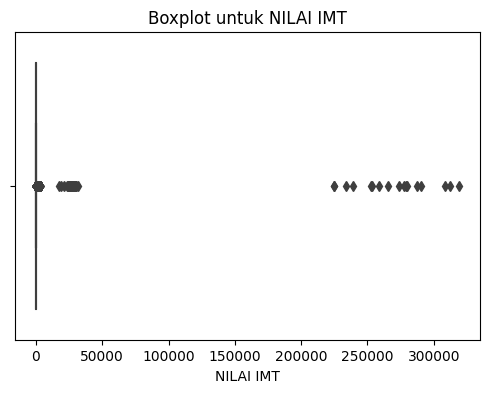

In [ ]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=data['NILAI IMT'])
plt.title('Boxplot untuk NILAI IMT')
plt.xlabel('NILAI IMT')
plt.show()

___
Dari hasil statistik dasar, dan juga boxplot NILAI IMT, dapat dilihat lumayan banyak outlier yang ada pada data IMT

In [ ]:
data[data['NILAI IMT'] > 40]['NILAI IMT'].count()

2410

___
Dapat dilihat bahwa data yang melebihi 40 ada sebanyak 2410 data

**--hal ini nanti akan dilanjutkan pada bagian outlier--**
___

___
**IMPUTASI DATA**
Data-data yang mengandung missing values selanjutnya akan diimputasi, dari variabel-variabel sebelumnya, variabel yang bertipe kategorik akan diisi dengan modus dari data, sedangkan variabel bertipe Float akan coba diisi dengan mean dari data variabel tersebut.

In [ ]:
dataupdate = data
dataupdate['Berapa jarak tempat sampah dengan rumah saudara ?'].fillna(data['Berapa jarak tempat sampah dengan rumah saudara ?'].mode()[0], inplace = True)
dataupdate['Berapa lama saudara menggosok gigi ?'].fillna(data['Berapa lama saudara menggosok gigi ?'].mode()[0], inplace = True)
dataupdate['NILAI IMT'].fillna(data['NILAI IMT'].mean(), inplace = True)

In [ ]:
dataupdate[['IMT', 'NILAI IMT']].iloc[[93, 111, 136, 186, 233, 251, 256]]

,IMT,NILAI IMT
93,NaN,50.528637
111,NaN,50.528637
136,NaN,50.528637
186,NaN,50.528637
233,NaN,50.528637
251,NaN,50.528637
256,NaN,50.528637


___
Dapat dilihat bahwa Nilai IMT dari tiap data yang sudah diimputasi menunjukkan nilai 50, di mana jika berdasarkan ketentuan IMT
* Sangat kurus : <17
* Kurus : 17- <18,5
* Normal: 18,5 – 25,0
* Gemuk:  > 25 -27
* Obesitas:  > 27 (Pedoman Gizi Seimbang, 2014) yang dipublikasi oleh https://p2ptm.kemkes.go.id/

maka semua data tersebut berada pada golongan "Obesitas"


In [ ]:
dataupdate['IMT'].fillna('Obesitas', inplace=True)

___
Akan dilihat kembali apakah masih ada Missing Value pada data yang sudah diperbaharui

In [ ]:
dataupdate.isna().sum().sort_values(ascending=False).head(10)

Jika Ya berapa jumlah gigi saudara yang Karies                              223744
Jika Ya, Berapa Batang Saudara merokok dalam sehari?                        152543
WILAYAH                                                                          0
Mudah lelah ?                                                                    0
Berapa lama saudara mandi ?                                                      0
Dalam 1 hari berapa kali Saudara mandi/ mencuci badan?                           0
Seberapa sering Saudara mengkonsumsi buah dan sayur dalam sehari?                0
Seberapa banyak Saudara mengkonsumsi air mineral dalam satu hari?                0
Berapa kali saudara olahraga/aktifitas fisik selama seminggu ?                   0
Apakah saudara menderita penyakit gigi dan mulut (karies/gigi berlubang)         0
dtype: int64

___
Dapat dilihat bahwa missing value tersisa pada variabel "JIKA YA," ini berarti tidak perlu lagi dilakukan imputasi pada variabel, sebab jika dilakukan imputasi, nantinya akan menghasilkan hasil yang tidak konsisten jika observasi tidak merokok.

### Outliers
---
Dari proses sebelumnya, dapat kita ketahui bahwa terdapat outliers yang tidak wajar pada data variabel "NILAI IMT", maka di section ini akan kita lanjutkan penanganannya dan juga memeriksa apakah ada kemungkinan data tidak wajar juga dari variabel-variabel lainnya

In [ ]:
def unique_values(data):
    unique_val = {}
    for col in data.columns:
        unique_val[col] = data[col].unique()
        print(f"Nilai unik pada kolom '{col}' adalah {unique_val[col]}")
    return unique_val

In [ ]:
unique_values(dataupdate.select_dtypes(exclude='number'))

Nilai unik pada kolom 'WILAYAH' adalah ['KALBAR', 'BENGKULU', 'SULSEL', 'SULUT', 'KEPRI', ..., 'RIAU', 'SULBAR', 'SULTRA', 'SUMBAR', 'SUMSEL']
Length: 34
Categories (34, object): ['ACEH', 'BABEL', 'BALI', 'BANTEN', ..., 'SULUT', 'SUMBAR', 'SUMSEL',
                          'SUMUT']
Nilai unik pada kolom 'JENIS KELAMIN' adalah ['LAKI - LAKI', 'PEREMPUAN']
Categories (2, object): ['LAKI - LAKI', 'PEREMPUAN']
Nilai unik pada kolom 'PENDIDIKAN TERAKHIR' adalah ['SMA', 'S2', 'SMP', 'S1', 'D3', 'S3']
Categories (6, object): ['D3', 'S1', 'S2', 'S3', 'SMA', 'SMP']
Nilai unik pada kolom 'Status Perkawinan' adalah ['Menikah', 'Belum Menikah', 'Duda', 'Janda']
Categories (4, object): ['Belum Menikah', 'Duda', 'Janda', 'Menikah']
Nilai unik pada kolom 'PENGELUARAN/BULAN' adalah ['Rp. 7 Juta s.d. 10 Juta', 'Rp. 2 Juta s.d. 6 Juta', 'Rp. 11 Juta s.d. 14 Juta', 'Di atas Rp. 15 Juta']
Categories (4, object): ['Di atas Rp. 15 Juta', 'Rp. 11 Juta s.d. 14 Juta', 'Rp. 2 Juta s.d. 6 Juta',
               

{'WILAYAH': ['KALBAR', 'BENGKULU', 'SULSEL', 'SULUT', 'KEPRI', ..., 'RIAU', 'SULBAR', 'SULTRA', 'SUMBAR', 'SUMSEL']
 Length: 34
 Categories (34, object): ['ACEH', 'BABEL', 'BALI', 'BANTEN', ..., 'SULUT', 'SUMBAR', 'SUMSEL',
                           'SUMUT'],
 'JENIS KELAMIN': ['LAKI - LAKI', 'PEREMPUAN']
 Categories (2, object): ['LAKI - LAKI', 'PEREMPUAN'],
 'PENDIDIKAN TERAKHIR': ['SMA', 'S2', 'SMP', 'S1', 'D3', 'S3']
 Categories (6, object): ['D3', 'S1', 'S2', 'S3', 'SMA', 'SMP'],
 'Status Perkawinan': ['Menikah', 'Belum Menikah', 'Duda', 'Janda']
 Categories (4, object): ['Belum Menikah', 'Duda', 'Janda', 'Menikah'],
 'PENGELUARAN/BULAN': ['Rp. 7 Juta s.d. 10 Juta', 'Rp. 2 Juta s.d. 6 Juta', 'Rp. 11 Juta s.d. 14 Juta', 'Di atas Rp. 15 Juta']
 Categories (4, object): ['Di atas Rp. 15 Juta', 'Rp. 11 Juta s.d. 14 Juta', 'Rp. 2 Juta s.d. 6 Juta',
                          'Rp. 7 Juta s.d. 10 Juta'],
 'Apakah saudara pernah di diagnosa atau menderita penyakit Jantung ?': ['Tidak', 'Ya

---
Dari tiap variabel kategorik di atas, tampak tidak ada variabel kategorik yang berisikan data yang di luar wajar

In [ ]:
dataupdate.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
USIA,289801.0,431.725080,75514.913816,15.000000,29.00000,38.000000,44.000000,2.309198e+07
LAMA BERDINAS,289801.0,598.438964,120162.165443,0.000000,9.00000,18.000000,23.000000,3.101201e+07
TINGGI BADAN,289801.0,169.270241,7.678521,1.640000,167.00000,170.000000,172.000000,1.799000e+03
BERAT BADAN,289801.0,96.176577,887.911773,1.000000,66.00000,72.000000,80.000000,9.021000e+04
LINGKAR PINGGANG,289801.0,65.558079,188.430313,-75.000000,36.00000,73.000000,84.000000,1.000000e+05
NILAI IMT,289801.0,50.528637,2100.069831,0.367309,23.30668,25.099502,27.548209,3.188776e+05


In [ ]:
pd.options.display.float_format = '{:.2f}'.format
dataupdate.describe().transpose()['max']

USIA               23091982.00
LAMA BERDINAS      31012014.00
TINGGI BADAN           1799.00
BERAT BADAN           90210.00
LINGKAR PINGGANG     100000.00
NILAI IMT            318877.55
Name: max, dtype: float64

---
Dari statistik di atas untuk variabel yang bertipe numerik, nampaknya ada beberapa yang janggal, di mana nilai maximum dari Variabel 'USIA' bernilai 2309192 begitu juga dengan variabel 'LAMA BERDINAS' dan seterusnya, maka akan dilihat isi unique dari tiap variabelnya

In [ ]:
dataupdate['USIA'].unique().astype(int)

array([      34,       43,       21,       40,       28,       47,
             41,       23,       19,       22,       25,       46,
             39,       50,       55,       26,       42,       32,
             44,       31,       37,       24,       27,       57,
             53,       56,       20,       36,       49,       51,
             29,       54,       38,       48,       45,       30,
             52,       35,       33,       58,       15,       16,
             17,     5429,       18,       81,       83,       59,
             80,       85,       88,      100,       64,       78,
             77,       67,      371,       79,       61,       72,
           5431,       68,       99,       66,       90,     4120,
             70,      442,       92,     5633,       69,       75,
             93,       87,  8011996,       97,      382,       60,
             89,       84,      422,       82,     4626,       62,
           4323,       76,     4325,     4826,       96,      

In [ ]:
dataupdate['LAMA BERDINAS'].unique().astype(int)

array([      16,       23,        1,        9,       25,       20,
             10,        3,        2,       29,       28,       34,
              7,       19,       33,       24,       22,       26,
             11,       18,        4,        5,        6,       31,
              8,       27,       32,       17,       13,       30,
             21,        0,       35,       15,        1,       36,
              1,       52,       44,       37,       16,        1,
             38,       43,       47,       55,       41,       54,
             97,       51,       48,       58,       39,       53,
             56,       14,       57,       12,       46,       42,
             90,       99,       50,       87,       45,       49,
             40,       93,       80,     1998,     2004,       98,
             96,     2001,       91,     2006,       95,       94,
             88,       76,     2015,     2013,        8,       86,
           2012,        7,        0,       92,       17,      

In [ ]:
dataupdate['TINGGI BADAN'] .unique().astype(int)

array([ 168,  169,  166,  164,  165,  168,  175,  172,  166,  166,  172,
        167,  175,  163,  167,   72,  168,  174,  161,  172,  160,  175,
        171,   17,  165,  170,  150,  165,  156,  168,  167,  166,  159,
        169,  173,  171,    1,  166,  176,    1,  166,    1,  171,  156,
        157,   17,  160,    1,    1,    1,    1,  162,   17,  177,  169,
        178,  176,  180,   16,    1,  178,  167,  171,  170,  165,    1,
        173,  170,   15,  182,  158,  185,  158,  164,  165,  167,    1,
        161,  179,  165,  169,  168,    1,  173,  170,   17,  163,   16,
        164,  171,  176,   16,  188,  173,  172,  164,  155,  174,  168,
          5,  174,  153,  180,  181,   16,  177,  162,  159,  187,   15,
        179,  185,  151,  157,   18,  152,   26,   20,  148,  154,   19,
         72,   23,   30,   29,   32,   33,   35,   39,   38,   65,   63,
         67,   68,   69,   71,   70,   45,   46,   76,   75,   53,  183,
         78,   80,   55,   57,   60,   84,   62,   

In [ ]:
dataupdate['BERAT BADAN'].unique().astype(int)

array([   85,    70,    60,    80,    62,    63,    71,    69,    74,
          82,    53,    54,    70,    78,    72,    65,    75,    84,
          68,    89,    57,    50,    73,    45,    58,    56,    52,
           6,    59,    83,    67,    66,    73,    69,    76,    52,
          90,    98,    87,    83,    59,    86,    95,    79,    75,
          66,    78,    69,    77,    62,    85,    92,    54,    71,
          68,    51,    87,    58,    80,    55,    62,    71,    70,
         115,    63,    57,    88,    98,    64,    71,    81,  7041,
          94,    95,    56,    84,  7836,    60,    64,    68,    53,
          90,   180,   179,   176,   175,   173,   172,   171,   170,
         169,   168,   167,   166,   165,   164,   163,   152,   110,
         100, 90210, 82777, 82102, 90105, 70890, 73100, 70125, 80100,
       85101, 85100, 80110, 69100, 78110, 70102, 64102, 72605, 79103,
       79100, 71770, 75110, 78105, 70100, 78102, 82110, 70167, 75773,
       67768, 68770,

In [ ]:
dataupdate['LINGKAR PINGGANG'].unique().astype(int)

array([   100,     80,     78,     34,     32,     90,     31,     45,
           30,     33,     75,     85,     55,     62,     82,    102,
           98,    110,     67,     70,     29,     38,     72,     35,
           68,     60,     83,     79,     73,     89,    108,     95,
           58,     99,     91,     74,     76,     63,     28,     36,
           42,     88,     92,     40,     65,     53,     46,     94,
           61,     96,     66,      0,     41,     86,     48,     64,
          120,     37,     81,     39,    105,    101,     71,     77,
           72,     43,    115,     84,    173,    121,    142,    103,
          170,    112,     93,     57,    114,     44,    111,     50,
           87,    106,     97,     69,     21,     47,     20,     56,
            6,    104,    113,    116,    109,    160,     54,     52,
          124,    125,    127,     27,     16,    118,     10,     59,
            4,    175,     14,    150,    129,    107,    126,    130,
      

---

Dapat dilihat dari isi data unique tiap-tiap variabel numerik, banyak sekali data yang nampaknya di luar kewajaran, maka akan dicoba lakukan subset dari data-data yang ada

---

---
Akan dicoba lakukan subset data, dengan pertimbangan batas normal IMT berdasarkan publikasi oleh https://p2ptm.kemkes.go.id/ di mana ketentuannya adalah sebagai berikut
* Sangat kurus : <17
* Kurus : 17- <18,5
* Normal: 18,5 – 25,0
* Gemuk:  > 25 -27
* Obesitas:  > 27 (Pedoman Gizi Seimbang, 2014)

Maka akan dicoba subset data dengan minimal IMT adalah 15 sedangkan maksimal IMT adalah 30

In [ ]:
dataupdate = dataupdate[(dataupdate['NILAI IMT'] > 15) & (data['NILAI IMT'] < 30)]

In [ ]:
pd.options.display.float_format = '{:.2f}'.format
dataupdate.describe().transpose()['max']

USIA               23091982.00
LAMA BERDINAS      31012014.00
TINGGI BADAN           1799.00
BERAT BADAN            9049.00
LINGKAR PINGGANG     100000.00
NILAI IMT                30.00
Name: max, dtype: float64

In [ ]:
len(dataupdate)

264161

In [ ]:
dataupdate.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
USIA,264161.00,469.67,79094.78,15.00,28.00,37.00,44.00,23091982.00
LAMA BERDINAS,264161.00,654.49,125858.61,0.00,9.00,18.00,23.00,31012014.00
TINGGI BADAN,264161.00,169.46,5.76,135.00,167.00,170.00,172.00,1799.00
BERAT BADAN,264161.00,71.51,19.39,35.00,65.00,70.00,78.00,9049.00
LINGKAR PINGGANG,264161.00,64.29,197.11,-75.00,35.00,70.00,81.00,100000.00
NILAI IMT,264161.00,24.87,2.51,15.04,23.14,24.80,26.73,30.00


---
Akan dilakukan pengambilan data di mana tinggi badan maksimal adalah 300, berat badan maksimal adalah 200, dan Usia maksimal adalah 100

In [ ]:
dataupdate = dataupdate[dataupdate['TINGGI BADAN'] < 300]
dataupdate = dataupdate[dataupdate['BERAT BADAN'] < 200]
dataupdate = dataupdate[dataupdate['USIA'] < 100]

---
Cek kembali data yang masih tidak wajar

In [ ]:
dataupdate.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
USIA,264108.00,36.69,9.97,15.00,28.00,37.00,44.00,99.00
LAMA BERDINAS,264108.00,536.52,110463.11,0.00,9.00,18.00,23.00,29122014.00
TINGGI BADAN,264108.00,169.45,4.80,135.00,167.00,170.00,172.00,271.00
BERAT BADAN,264108.00,71.48,8.43,35.00,65.00,70.00,78.00,171.00
LINGKAR PINGGANG,264108.00,64.29,197.13,-75.00,35.00,70.00,81.00,100000.00
NILAI IMT,264108.00,24.87,2.51,15.04,23.14,24.80,26.73,30.00


---
Dapat dilihat bahwa variabel 'LAMA BERDINAS' dan 'LINGKAR PINGGANG' masih terlihat tidak wajar

In [ ]:
dataupdate[['USIA', 'LAMA BERDINAS']]

,USIA,LAMA BERDINAS
0,34.00,16.00
1,43.00,23.00
2,21.00,1.00
3,40.00,23.00
4,28.00,9.00
...,...,...
289794,46.00,26.00
289795,53.00,33.00
289796,23.00,4.00
289797,54.00,27.00


---
Perhatikan bahwa, lama dinas dari seseorang *tidak mungkin* lebih besar dibandingkan usianya, lalu berdasarkan kepada UNDANG-UNDANG REPUBLIK INDONESIA NOMOR 20 TAHUN 1999 TENTANG
PENGESAHAN ILO CONVENTION NO. 138 CONCERNING MINIMUM AGE
FOR ADMISSION TO EMPLOYMENT (KONVENSI ILO MENGENAI
USIA MINIMUM UNTUK DIPERBOLEHKAN BEKERJA). Batas minimum bekerja yang diperbolehkan di Indonesia adalah 15 tahun. Maka akan diambil data di mana selisih antara Usia observasi dengan Lama berdinas adalah > 14 tahun

In [ ]:
dataupdate = dataupdate[dataupdate['USIA'] - dataupdate['LAMA BERDINAS'] > 14]

In [ ]:
dataupdate.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
USIA,257467.00,36.82,9.91,16.00,28.00,37.00,44.00,99.00
LAMA BERDINAS,257467.00,16.22,9.17,0.00,9.00,17.00,23.00,60.00
TINGGI BADAN,257467.00,169.45,4.81,135.00,167.00,170.00,172.00,271.00
BERAT BADAN,257467.00,71.50,8.43,35.00,65.00,70.00,78.00,171.00
LINGKAR PINGGANG,257467.00,64.39,199.61,-75.00,35.00,70.00,82.00,100000.00
NILAI IMT,257467.00,24.88,2.51,15.04,23.14,24.80,26.73,30.00


---
Masih tersisa variabel 'LINGKAR PINGGANG' yang terlihat tidak wajar, maka selanjutnya akan dilakukan update data dengan minimum lingkar pinggang adalah 30 dan maksimum lingkar pinggang adalah 110, lalu maksimal selisih antara lingkar pinggang dan berat badan adalah 30, dan lingkar pinggang lebih besar sama dengan berat badan

In [ ]:
dataupdate = dataupdate[(dataupdate['LINGKAR PINGGANG'] < 110) & (abs(dataupdate['LINGKAR PINGGANG'] - dataupdate['BERAT BADAN']) < 30) & (dataupdate['LINGKAR PINGGANG'] > 30) & (dataupdate['LINGKAR PINGGANG'] >= dataupdate['BERAT BADAN'])]

In [ ]:
dataupdate.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
USIA,120874.00,37.20,10.27,16.00,28.00,38.00,44.00,99.00
LAMA BERDINAS,120874.00,16.50,9.51,0.00,8.00,18.00,23.00,46.00
TINGGI BADAN,120874.00,168.98,4.86,136.00,166.00,169.00,172.00,199.00
BERAT BADAN,120874.00,70.58,8.07,35.00,65.00,70.00,75.00,103.00
LINGKAR PINGGANG,120874.00,81.83,9.88,40.00,75.00,80.00,90.00,109.00
NILAI IMT,120874.00,24.70,2.44,15.39,23.03,24.61,26.42,30.00


---
Terlihat bahwa tiap variabel telah terlihat wajar, sehingga inilah data final yang diharapkan, selanjutnya dilakukan reset index agar data menjadi lebih rapih

In [ ]:
#Reset index pada data yang sudah di-update
dataupdate.reset_index(drop=True, inplace=True)
dataupdate.head()

,WILAYAH,JENIS KELAMIN,USIA,LAMA BERDINAS,PENDIDIKAN TERAKHIR,TINGGI BADAN,BERAT BADAN,LINGKAR PINGGANG,Status Perkawinan,PENGELUARAN/BULAN,...,Sumber air bersih di tempat tinggal saudara ?,Penggunaan air bersih untuk makan & minum bersumber dari :,Berapa jarak jamban dengan sumur dirumah saudara ?,Bagaimana saluran pembuangan air (sanitasi) rumah tangga?,Apakah terdapat tempat sampah di sekitar rumah?,Berapa jarak tempat sampah dengan rumah saudara ?,Apakah di sekitar tempat tinggal Saudara tersedia fasilitas umum (fasum) untuk kegiatan/aktivitas olah raga?,Kelompok Umur,NILAI IMT,IMT
0,KALBAR,LAKI - LAKI,34.00,16.00,SMA,168.90,85.00,100.00,Menikah,Rp. 7 Juta s.d. 10 Juta,...,Air PAM,Tadah hujan,Lebih dari 12 meter,Ada,"Ada, terbuka",Lebih dari 10 meter,Tidak ada,25 - 34,29.80,Obesitas
1,KALBAR,LAKI - LAKI,43.00,23.00,SMA,169.50,70.00,80.00,Menikah,Rp. 2 Juta s.d. 6 Juta,...,Air PAM,Air mineral isi ulang,Lebih dari 12 meter,Ada,"Ada, tertutup",Lebih dari 10 meter,Tidak ada,35 - 44,24.36,Normal
2,KALBAR,LAKI - LAKI,21.00,1.00,SMA,169.50,60.00,78.00,Belum Menikah,Rp. 2 Juta s.d. 6 Juta,...,Air PAM,Air mineral isi ulang,Tidak memiliki jamban sehat,Ada,Tidak ada,Lebih dari 10 meter,Tidak ada,15 - 24,20.88,Normal
3,KALBAR,LAKI - LAKI,41.00,20.00,S1,168.50,71.00,90.00,Menikah,Rp. 2 Juta s.d. 6 Juta,...,Air PAM,Tadah hujan,Lebih dari 12 meter,Ada,Tidak ada,Lebih dari 10 meter,Tidak ada,35 - 44,25.01,Gemuk
4,SULSEL,LAKI - LAKI,50.00,20.00,SMA,172.50,72.00,85.00,Menikah,Rp. 2 Juta s.d. 6 Juta,...,Air PAM,Air PAM,Lebih dari 12 meter,Ada,"Ada, tertutup",Kurang dari 10 meter,Tidak ada,45 - 54,24.20,Normal


### Data Update

In [ ]:
#Menyimpan data update agar nanti dapat di load untuk memotong proses load data awal yang belum di preprocessing
#dataupdate.to_excel('dataupdate.xlsx', index=False)

In [ ]:
#Load data Update agar data yang diload tidak terlalu lama(hapus tanda # untuk load, !!Jangan load ini jika memulai Run dari Awal!!)
#import pandas as pd
#dataupdate = pd.read_excel('dataupdate.xlsx')

### Subset Data
---
Pada bagian ini, data yang sudah di cleaning akan dibuat menjadi beberapa subset data berdasarkan beberapa indikator

In [ ]:
dataupdate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120874 entries, 0 to 120873
Data columns (total 78 columns):
 #   Column                                                                                                             Non-Null Count   Dtype   
---  ------                                                                                                             --------------   -----   
 0   WILAYAH                                                                                                            120874 non-null  category
 1   JENIS KELAMIN                                                                                                      120874 non-null  category
 2   USIA                                                                                                               120874 non-null  float64 
 3   LAMA BERDINAS                                                                                                      120874 non-null  float64 
 4   PENDIDIK

#### Data Status
___
Data ini berisikan data tentang status dari observasi seperti jenis kelamin, berat badan, tinggi badan dan sebagainya

In [ ]:
data_status = pd.concat([dataupdate.iloc[:, 75:78], dataupdate.iloc[:, 1:10]], axis = 1)

#### Data Riwayat Penyakit
___
Data ini berisikan data riwayat penyakit dari observasi

In [ ]:
data_riwayatpenyakit = pd.concat([dataupdate.iloc[:,75], dataupdate.iloc[:, 10:30]], axis = 1)

#### Data Mental
___
Data ini berisikan data keadaan mental dari observasi

In [ ]:
data_mental =  pd.concat([dataupdate.iloc[:,75], dataupdate.iloc[:,30:50]], axis = 1)

#### Data Kondisi
___
Data ini berisikan data kondisi fisik dan juga gaya hidup dari observasi

In [ ]:
data_kondisi = pd.concat([dataupdate.iloc[:,75], dataupdate.iloc[:,50:66]], axis = 1)

#### Data Lingkungan
___
Data ini berisikan keadaan lingkungan tempat tinggal dari observaasi

In [ ]:
data_lingkungan = pd.concat([dataupdate.iloc[:,75], dataupdate.iloc[:,66:75]], axis = 1)

___
Akan dicek kondisi dari data subset, dan juga mengganti nama-nama kolom agar lebih mudah
___

In [ ]:
data_status.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120874 entries, 0 to 120873
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   Kelompok Umur        120874 non-null  category
 1   NILAI IMT            120874 non-null  float64 
 2   IMT                  120874 non-null  category
 3   JENIS KELAMIN        120874 non-null  category
 4   USIA                 120874 non-null  float64 
 5   LAMA BERDINAS        120874 non-null  float64 
 6   PENDIDIKAN TERAKHIR  120874 non-null  category
 7   TINGGI BADAN         120874 non-null  float64 
 8   BERAT BADAN          120874 non-null  float64 
 9   LINGKAR PINGGANG     120874 non-null  float64 
 10  Status Perkawinan    120874 non-null  category
 11  PENGELUARAN/BULAN    120874 non-null  category
dtypes: category(6), float64(6)
memory usage: 6.2 MB


In [ ]:
# Daftar kolom yang ingin diubah
rename_columnspenyakit = {
    'Apakah saudara pernah di diagnosa atau menderita penyakit Jantung ?': 'JANTUNG',
    'Apakah saudara pernah di diagnosa atau menderita penyakit Stroke ?': 'STROKE',
    'Apakah saudara pernah di diagnosa atau menderita penyakit Diabetes Melitus ?': 'DIABETES',
    'Apakah saudara pernah di diagnosa atau menderita penyakit Hipertensi ?': 'HIPERTENSI' ,
    'Apakah saudara pernah di diagnosa atau menderita penyakit Kanker ?': 'KANKER',
    'Apakah saudara pernah di diagnosa atau menderita penyakit Ginjal ?': 'GINJAL',
    'Apakah saudara pernah di diagnosa atau menderita penyakit Tumor ?': 'TUMOR',
    'Apakah saudara pernah di diagnosa atau menderita penyakit Osteoartritis ?': 'OSTEO',
    'Apakah saudara pernah di diagnosa atau menderita penyakit Lambung ?': 'LAMBUNG',
    'Apakah saudara pernah di diagnosa atau menderita penyakit Liver ?': 'LIVER',
    'Apakah saudara pernah di diagnosa atau menderita penyakit  Tuberculosis (TBC) ?': 'TBC',
    'Apakah saudara pernah di diagnosa atau menderita penyakit  Demam Berdarah Dengue (DBD) ?': 'DBD',
    'Apakah saudara pernah di diagnosa atau menderita penyakit  COVID-19 ?': 'COVID-19',
    'Apakah saudara pernah di diagnosa atau menderita penyakit  HIV/AIDS ?': 'HIV/AIDS',
    'Apakah saudara pernah di diagnosa atau menderita penyakit  Diare ?': 'DIARE',
    'Apakah saudara pernah di diagnosa atau menderita penyakit  Malaria ?': 'MALARIA',
    'Apakah saudara pernah di diagnosa atau menderita penyakit  Gonore atau Sipilis ?': 'GONORE/SIPILIS',
    'Apakah saudara pernah di diagnosa atau menderita penyakit  Thypus ?': 'THYPUS',
    'Apakah saudara pernah di diagnosa atau menderita penyakit  Dermatitis (Skabies)/ peradangan atau iritasi kulit ?': 'DERMATITIS',
    'Apakah saudara pernah di diagnosa atau menderita penyakit  Mikosis (infeksi jamur) ?': 'MIKOSIS'
}

# Menggunakan metode rename pada DataFrame
data_riwayatpenyakit.rename(columns=rename_columnspenyakit, inplace=True)

In [ ]:
data_riwayatpenyakit.head()

,Kelompok Umur,JANTUNG,STROKE,DIABETES,HIPERTENSI,KANKER,GINJAL,TUMOR,OSTEO,LAMBUNG,...,TBC,DBD,COVID-19,HIV/AIDS,DIARE,MALARIA,GONORE/SIPILIS,THYPUS,DERMATITIS,MIKOSIS
0,25 - 34,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Ya,...,Tidak,Tidak,Ya,Tidak,Ya,Tidak,Tidak,Tidak,Ya,Tidak
1,35 - 44,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,...,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak
2,15 - 24,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,...,Tidak,Tidak,Tidak,Tidak,Ya,Tidak,Tidak,Tidak,Tidak,Tidak
3,35 - 44,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,...,Tidak,Tidak,Tidak,Tidak,Ya,Tidak,Tidak,Tidak,Tidak,Tidak
4,45 - 54,Tidak,Tidak,Ya,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,...,Tidak,Tidak,Tidak,Tidak,Ya,Tidak,Tidak,Tidak,Tidak,Tidak


In [ ]:
# Daftar kolom yang ingin diubah
rename_columnsmental = {
    'Sering menderita sakit kepala ?': 'sakitkepala',
    'Tidak nafsu makan ?': 'tidaknafsu',
    'Sulit tidur ?': 'sulittidur',
    'Mudah takut ?': 'takut' ,
    'Merasa tegang, cemas atau kuatir ?': 'cemas',
    'Tangan anda gemetar ?': 'gemetar',
    'Pencernaan anda terganggu / buruk ?': 'pencernaan',
    'Sulit untuk berpikir jernih ?': 'sulitpikiranjernih',
    'Merasa tidak bahagia ?': 'tidakbahagia',
    'Menangis lebih sering ?': 'seringmenangis',
    'Merasa sulit untuk menikmati kegiatan sehari – hari?': 'sulitnikmatihari',
    'Sulit untuk mengambil keputusan ?': 'sulitambilkeputusan',
    'Pekerjaan anda sehari – hari terganggu ?': 'pekerjaanterganggu',
    'Tidak mampu melakukan hal – hal yang bermanfaat dalam hidup?': 'bermanfaat',
    'Kehilangan minat pada berbagai hal ?': 'hilangminat',
    'Tidak merasa berharga?': 'tidakberharga',
    'Mempunyai pikiran untuk mengakhiri hidup?': 'suicide',
    'Merasa lelah sepanjang waktu?': 'lelah',
    'Mengalami rasa tidak enak di perut?': 'tidakenakperut',
    'Mudah lelah ?': 'mudahlelah',

}

# Menggunakan metode rename pada DataFrame
data_mental.rename(columns=rename_columnsmental, inplace=True)

In [ ]:
data_mental.head()

,Kelompok Umur,sakitkepala,tidaknafsu,sulittidur,takut,cemas,gemetar,pencernaan,sulitpikiranjernih,tidakbahagia,...,sulitnikmatihari,sulitambilkeputusan,pekerjaanterganggu,bermanfaat,hilangminat,tidakberharga,suicide,lelah,tidakenakperut,mudahlelah
0,25 - 34,Kadang - kadang,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,...,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak
1,35 - 44,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,...,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak
2,15 - 24,Kadang - kadang,Tidak,Tidak,Kadang - kadang,Tidak,Tidak,Tidak,Tidak,Tidak,...,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak
3,35 - 44,Kadang - kadang,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,...,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak
4,45 - 54,Kadang - kadang,Tidak,Tidak,Tidak,Kadang - kadang,Tidak,Kadang - kadang,Tidak,Tidak,...,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Kadang - kadang,Tidak


In [ ]:
# Daftar kolom yang ingin diubah
rename_columnskondisi = {
    'Apakah saudara menderita penyakit gigi dan mulut (karies/gigi berlubang)': 'karies',
    'Jika Ya berapa jumlah gigi saudara yang Karies': 'gigikaries',
    'Berapa kali saudara olahraga/aktifitas fisik selama seminggu ?': 'olahraga',
    'Seberapa banyak Saudara mengkonsumsi air mineral dalam satu hari?': 'konsumair' ,
    'Seberapa sering Saudara mengkonsumsi buah dan sayur dalam sehari?': 'konsumbuah',
    'Dalam 1 hari berapa kali Saudara mandi/ mencuci badan?': 'mandi',
    'Berapa lama saudara mandi ?': 'waktumandi',
    'Apakah saudara merokok ?': 'rokok',
    'Jika Ya, Berapa Batang Saudara merokok dalam sehari?': 'jumlahrokok',
    'Seberapa banyak saudara mengkonsumsi gula/pemanis setiap harinya ?': 'gula',
    'Seberapa banyak Saudara mengkonsumsi Alkohol setiap hari ?': 'alkohol',
    'Seberapa banyak Saudara mengkonsumsi makanan-makanan junk food dan berminyak dalam sehari': 'junkfood',
    'Dalam satu hari berapa kali Saudara membersihkan/ menggosok gigi ?': 'gosokgigi',
    'Berapa lama saudara menggosok gigi ?': 'waktugosokgigi',
    'Dalam sehari, berapa kali Saudara mengganti pakaian dalam?': 'pakaiandalam',
    'Apakah Saudara selalu mencuci tangan dengan air bersih dan sabun sebelum makan?': 'cucitangan',
}

# Menggunakan metode rename pada DataFrame
data_kondisi.rename(columns=rename_columnskondisi, inplace=True)

In [ ]:
data_kondisi.head()

,Kelompok Umur,karies,gigikaries,olahraga,konsumair,konsumbuah,mandi,waktumandi,rokok,jumlahrokok,gula,alkohol,junkfood,gosokgigi,waktugosokgigi,pakaiandalam,cucitangan
0,25 - 34,Tidak,NaN,4 kali atau lebih dalam seminggu,Lebih dari 2 liter,Kurang dari 400gr,> 2 Kali,2 - 5 menit,Ya,Dibawah 1 bungkus/perhari,Kurang dari 6 sendok teh,Tidak pernah,1 - 2 kali/hari,> 2 Kali,1 - 2 menit,2 Kali,Selalu
1,35 - 44,Tidak,NaN,4 kali atau lebih dalam seminggu,Lebih dari 2 liter,Kurang dari 400gr,2 Kali,> 5 menit,Tidak,NaN,Tidak pernah,Tidak pernah,Tidak pernah,2 Kali,Di atas 3 menit,> 2 Kali,Selalu
2,15 - 24,Tidak,NaN,4 kali atau lebih dalam seminggu,2 Liter,400gr/lebih,2 Kali,2 - 5 menit,Tidak,NaN,Kurang dari 6 sendok teh,Tidak pernah,1 - 2 kali/hari,2 Kali,1 - 2 menit,2 Kali,Selalu
3,35 - 44,Ya,1 - 3 gigi karies/berlubang,4 kali atau lebih dalam seminggu,Lebih dari 2 liter,Kurang dari 400gr,2 Kali,2 - 5 menit,Tidak,NaN,Kurang dari 6 sendok teh,Tidak pernah,1 - 2 kali/hari,2 Kali,1 - 2 menit,2 Kali,Selalu
4,45 - 54,Ya,1 - 3 gigi karies/berlubang,Kurang dari 4 kali dalam seminggu,Kurang dari 2 Liter,400gr/lebih,2 Kali,> 5 menit,Tidak,NaN,Kurang dari 6 sendok teh,Tidak pernah,Tidak pernah,2 Kali,1 - 2 menit,2 Kali,Selalu


In [ ]:
# Daftar kolom yang ingin diubah
rename_columnslingkungan = {
    'Apakah tempat tinggal Saudara mempunyai penghawaan/sirkulasi udara yang cukup?': 'sirkulasirumah',
    'Apakah lingkungan tempat tinggal Saudara saat ini terkontaminasi/ terganggu akibat polusi udara yang tidak sehat?': 'polusiudararumah',
    'Sumber air bersih di tempat tinggal saudara ?': 'sumberair',
    'Penggunaan air bersih untuk makan & minum bersumber dari : ': 'airminum' ,
    'Berapa jarak jamban dengan sumur dirumah saudara ?': 'jarakjamban',
    'Bagaimana saluran pembuangan air (sanitasi) rumah tangga?': 'sanitasi',
    'Apakah terdapat tempat sampah di sekitar rumah? ': 'tempatsampah',
    'Berapa jarak tempat sampah dengan rumah saudara ?': 'jaraktempatsampah',
    'Apakah di sekitar tempat tinggal Saudara tersedia fasilitas umum (fasum) untuk kegiatan/aktivitas olah raga?': 'faumolahraga',
}

# Menggunakan metode rename pada DataFrame
data_lingkungan.rename(columns=rename_columnslingkungan, inplace=True)

In [ ]:
data_lingkungan.head()

,Kelompok Umur,sirkulasirumah,polusiudararumah,sumberair,airminum,jarakjamban,sanitasi,tempatsampah,jaraktempatsampah,faumolahraga
0,25 - 34,Lebih dari 1 sirkulasi udara,Tidak,Air PAM,Tadah hujan,Lebih dari 12 meter,Ada,"Ada, terbuka",Lebih dari 10 meter,Tidak ada
1,35 - 44,Lebih dari 1 sirkulasi udara,Tidak,Air PAM,Air mineral isi ulang,Lebih dari 12 meter,Ada,"Ada, tertutup",Lebih dari 10 meter,Tidak ada
2,15 - 24,Lebih dari 1 sirkulasi udara,Tidak,Air PAM,Air mineral isi ulang,Tidak memiliki jamban sehat,Ada,Tidak ada,Lebih dari 10 meter,Tidak ada
3,35 - 44,Lebih dari 1 sirkulasi udara,Tidak,Air PAM,Tadah hujan,Lebih dari 12 meter,Ada,Tidak ada,Lebih dari 10 meter,Tidak ada
4,45 - 54,Lebih dari 1 sirkulasi udara,Tidak,Air PAM,Air PAM,Lebih dari 12 meter,Ada,"Ada, tertutup",Kurang dari 10 meter,Tidak ada


## EVDA

###Data Riwayat Penyakit

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Sample data with categorical values
data_sakit = data_riwayatpenyakit[["JANTUNG", "STROKE", "DIABETES", "HIPERTENSI","KANKER","GINJAL","TUMOR","OSTEO",
                                   "LAMBUNG","LIVER","TBC","DBD","COVID-19","HIV/AIDS","DIARE",'MALARIA',"GONORE/SIPILIS","THYPUS","DERMATITIS","MIKOSIS"]]

# Label encoding for each column
label_encoder = LabelEncoder()
for column in data_sakit.columns:
    data_sakit[column] = label_encoder.fit_transform(data_sakit[column])

data_sakit.head()

<ipython-input-68-90e0d4876a72>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sakit[column] = label_encoder.fit_transform(data_sakit[column])
<ipython-input-68-90e0d4876a72>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sakit[column] = label_encoder.fit_transform(data_sakit[column])
<ipython-input-68-90e0d4876a72>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

,JANTUNG,STROKE,DIABETES,HIPERTENSI,KANKER,GINJAL,TUMOR,OSTEO,LAMBUNG,LIVER,TBC,DBD,COVID-19,HIV/AIDS,DIARE,MALARIA,GONORE/SIPILIS,THYPUS,DERMATITIS,MIKOSIS
0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [ ]:
tingkat_sakit = data_sakit['RowSum']=data_sakit[["JANTUNG", "STROKE", "DIABETES", "HIPERTENSI","KANKER","GINJAL","TUMOR","OSTEO",
                                   "LAMBUNG","LIVER","TBC","DBD","COVID-19","HIV/AIDS","DIARE",'MALARIA',"GONORE/SIPILIS","THYPUS","DERMATITIS","MIKOSIS",]].sum(axis=1)

tingkat_sakit

0         4
1         0
2         1
3         1
4         2
         ..
120869    1
120870    2
120871    0
120872    1
120873    0
Length: 120874, dtype: int64

In [ ]:
data_sakit.head()

,JANTUNG,STROKE,DIABETES,HIPERTENSI,KANKER,GINJAL,TUMOR,OSTEO,LAMBUNG,LIVER,...,DBD,COVID-19,HIV/AIDS,DIARE,MALARIA,GONORE/SIPILIS,THYPUS,DERMATITIS,MIKOSIS,RowSum
0,0,0,0,0,0,0,0,0,1,0,...,0,1,0,1,0,0,0,1,0,4
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,2


In [ ]:
combined = data_riwayatpenyakit[['Kelompok Umur']].copy()
combined['tingkat_sakit'] = tingkat_sakit
combined.sample(10)

,Kelompok Umur,tingkat_sakit
114632,15 - 24,0
28870,45 - 54,0
116058,15 - 24,0
96030,45 - 54,2
45018,55 - 64,4
28408,25 - 34,0
116625,45 - 54,0
48699,25 - 34,1
84509,25 - 34,0
16072,35 - 44,0


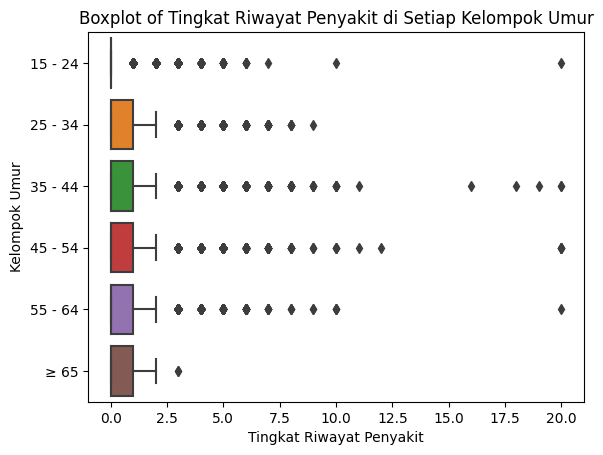

In [ ]:
sns.boxplot(x='tingkat_sakit', y='Kelompok Umur', data=combined, orient='h')
plt.xlabel('Tingkat Riwayat Penyakit')
plt.ylabel('Kelompok Umur')
plt.title('Boxplot of Tingkat Riwayat Penyakit di Setiap Kelompok Umur')
plt.show()

Cara baca: makin besar makin jelek kualitas kesehatannya atau lebih banyak penyakit yang diderita.
Tidak terlihat perbedaan yang signifikan antara riwayat penyakit kronis di semua kalangan, kecuali di usia 15-24 tahun yang cenderung belum mengidap penyakit kronis.

In [ ]:
data_riwayatpenyakit2 = data_riwayatpenyakit[["JANTUNG", "STROKE", "DIABETES", "HIPERTENSI","KANKER","GINJAL","TUMOR","OSTEO",
                                   "LAMBUNG","LIVER","TBC","DBD","COVID-19","HIV/AIDS","DIARE",'MALARIA',"GONORE/SIPILIS","THYPUS","DERMATITIS","MIKOSIS"]]

def encode_value(value):
    if value == 'Tidak':
        return 0
    elif value == 'Ya':
        return 1
    else:
        return value

# encoding semua data
for column in data_riwayatpenyakit2.columns:
    data_riwayatpenyakit2[column] = data_riwayatpenyakit[column].apply(encode_value)

data_riwayatpenyakit2.head()

<ipython-input-73-8be51f1019d8>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_riwayatpenyakit2[column] = data_riwayatpenyakit[column].apply(encode_value)
<ipython-input-73-8be51f1019d8>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_riwayatpenyakit2[column] = data_riwayatpenyakit[column].apply(encode_value)
<ipython-input-73-8be51f1019d8>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

,JANTUNG,STROKE,DIABETES,HIPERTENSI,KANKER,GINJAL,TUMOR,OSTEO,LAMBUNG,LIVER,TBC,DBD,COVID-19,HIV/AIDS,DIARE,MALARIA,GONORE/SIPILIS,THYPUS,DERMATITIS,MIKOSIS
0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


Tidak ada perbedaan signifikan, hanya saja pada usia 15-24 cenderung belum memiliki riwayat penyakit. Outlier akan dihiraukan karena tidak ada yang terlalu menonjol

<Axes: xlabel='USIA', ylabel='IMT'>

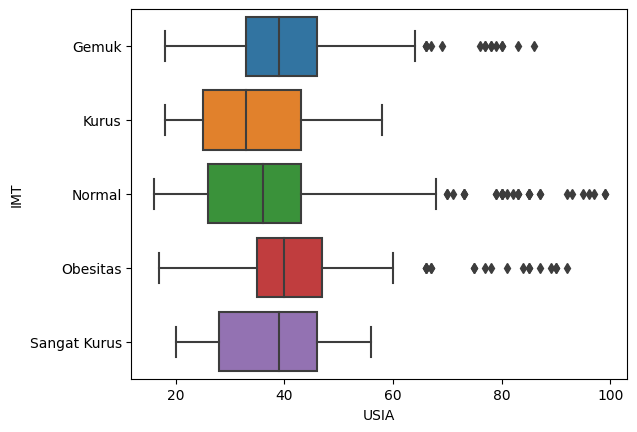

In [ ]:
#Grafik Hubungan Umur dengan Status
sns.boxplot(x="USIA", y="IMT", data=data_status)

___
**Kasus Diabetes**
___

In [ ]:
#Memfokuskan penelusuran insight ke data penderita diabetes melitus
import seaborn as sns
import matplotlib.pyplot as plt
datadiabet = data_riwayatpenyakit[data_riwayatpenyakit['DIABETES'] == 'Ya']
datadiabet.reset_index(drop = True, inplace = True)

In [ ]:
datadiabet.head()

,Kelompok Umur,JANTUNG,STROKE,DIABETES,HIPERTENSI,KANKER,GINJAL,TUMOR,OSTEO,LAMBUNG,...,TBC,DBD,COVID-19,HIV/AIDS,DIARE,MALARIA,GONORE/SIPILIS,THYPUS,DERMATITIS,MIKOSIS
0,45 - 54,Tidak,Tidak,Ya,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,...,Tidak,Tidak,Tidak,Tidak,Ya,Tidak,Tidak,Tidak,Tidak,Tidak
1,45 - 54,Tidak,Ya,Ya,Ya,Tidak,Tidak,Tidak,Tidak,Tidak,...,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak
2,45 - 54,Tidak,Tidak,Ya,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,...,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak
3,45 - 54,Tidak,Tidak,Ya,Tidak,Tidak,Ya,Tidak,Tidak,Tidak,...,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak
4,55 - 64,Tidak,Tidak,Ya,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,...,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak


In [ ]:
datadiabet = datadiabet[['Kelompok Umur', 'DIABETES', 'JANTUNG', 'STROKE', 'HIPERTENSI',
       'KANKER', 'GINJAL', 'TUMOR', 'OSTEO', 'LAMBUNG', 'LIVER', 'TBC', 'DBD',
       'COVID-19', 'HIV/AIDS', 'DIARE', 'MALARIA', 'GONORE/SIPILIS', 'THYPUS',
       'DERMATITIS', 'MIKOSIS']]

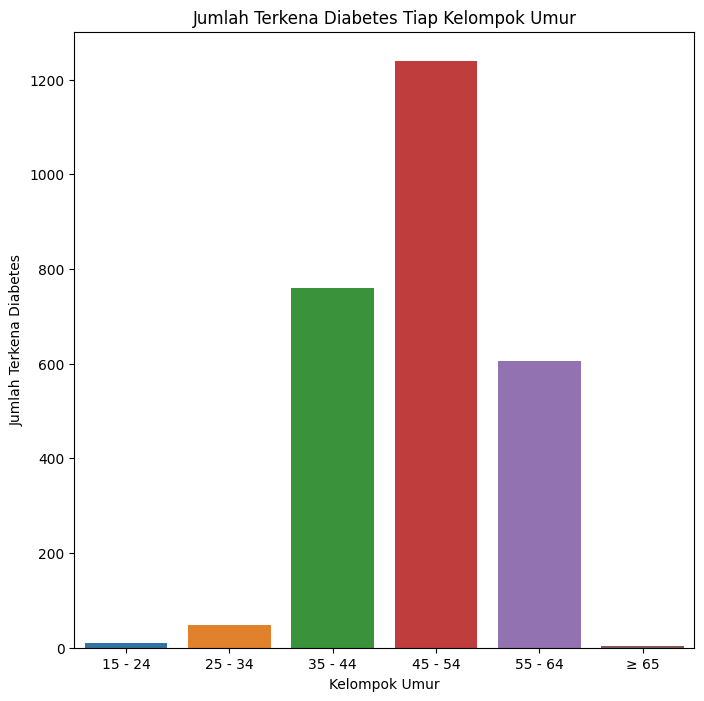

In [ ]:
# Plot data penderita diabetes berdasarkan kelompok umur
plt.figure(figsize=(8, 8))
sns.countplot(data=datadiabet, x='Kelompok Umur', order=['15 - 24', '25 - 34', '35 - 44', '45 - 54', '55 - 64', '≥ 65'])
plt.xlabel('Kelompok Umur')
plt.ylabel('Jumlah Terkena Diabetes')
plt.title('Jumlah Terkena Diabetes Tiap Kelompok Umur')
plt.show()

___
Dapat dilihat dari grafik, berdasarkan umur, kebanyakan penderita diabetes adalah mereka yang berada di mulai dari rentang usia 35 hingga seterusnya. Pada data yang kami miliki, kebetulan menunjukkan yang terbanyak adalah pada kelompok umur 45 - 55

In [ ]:
#Menggabungkan data penyakit lainnya
hiper = pd.DataFrame({'Penyakit': ['HIPERTENSI'] * datadiabet[datadiabet['HIPERTENSI'] == 'Ya'].shape[0]})
jantung = pd.DataFrame({'Penyakit': ['JANTUNG'] * datadiabet[datadiabet['JANTUNG'] == 'Ya'].shape[0]})
strok = pd.DataFrame({'Penyakit': ['STROKE'] * datadiabet[datadiabet['STROKE'] == 'Ya'].shape[0]})
ginjal = pd.DataFrame({'Penyakit': ['GINJAL'] * datadiabet[datadiabet['GINJAL'] == 'Ya'].shape[0]})
liver = pd.DataFrame({'Penyakit': ['LIVER'] * datadiabet[datadiabet['LIVER'] == 'Ya'].shape[0]})
lambung = pd.DataFrame({'Penyakit': ['LAMBUNG'] * datadiabet[datadiabet['LAMBUNG'] == 'Ya'].shape[0]})
tbc = pd.DataFrame({'Penyakit': ['TBC'] * datadiabet[datadiabet['TBC'] == 'Ya'].shape[0]})
kanker = pd.DataFrame({'Penyakit': ['KANKER'] * datadiabet[datadiabet['KANKER'] == 'Ya'].shape[0]})
tumor = pd.DataFrame({'Penyakit': ['TUMOR'] * datadiabet[datadiabet['TUMOR'] == 'Ya'].shape[0]})
osteo = pd.DataFrame({'Penyakit': ['OSTEO'] * datadiabet[datadiabet['OSTEO'] == 'Ya'].shape[0]})
dbd = pd.DataFrame({'Penyakit': ['DBD'] * datadiabet[datadiabet['DBD'] == 'Ya'].shape[0]})
covid = pd.DataFrame({'Penyakit': ['COVID'] * datadiabet[datadiabet['COVID-19'] == 'Ya'].shape[0]})
hiv = pd.DataFrame({'Penyakit': ['HIV'] * datadiabet[datadiabet['HIV/AIDS'] == 'Ya'].shape[0]})
diare = pd.DataFrame({'Penyakit': ['DIARE'] * datadiabet[datadiabet['DIARE'] == 'Ya'].shape[0]})
malaria = pd.DataFrame({'Penyakit': ['MALARIA'] * datadiabet[datadiabet['MALARIA'] == 'Ya'].shape[0]})
gonore = pd.DataFrame({'Penyakit': ['GONORE'] * datadiabet[datadiabet['GONORE/SIPILIS'] == 'Ya'].shape[0]})
tipus = pd.DataFrame({'Penyakit': ['TIFUS'] * datadiabet[datadiabet['THYPUS'] == 'Ya'].shape[0]})
derma = pd.DataFrame({'Penyakit': ['DERMATITIS'] * datadiabet[datadiabet['DERMATITIS'] == 'Ya'].shape[0]})
miko = pd.DataFrame({'Penyakit': ['MIKOSIS'] * datadiabet[datadiabet['MIKOSIS'] == 'Ya'].shape[0]})

In [ ]:
kombin = [hiper, lambung, diare, covid, jantung, tipus, strok, malaria, ginjal, derma, tbc, miko, dbd, liver, osteo, kanker, tumor, hiv, gonore]
sakit = pd.concat(kombin, ignore_index=True)

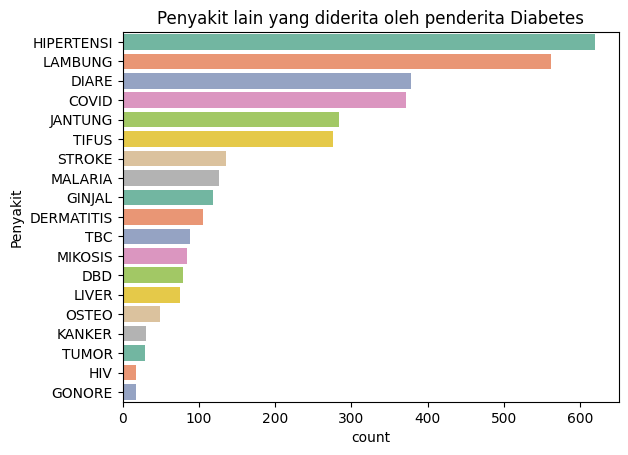

In [ ]:
sns.countplot(y = sakit['Penyakit'], palette = "Set2")
plt.title("Penyakit lain yang diderita oleh penderita Diabetes")
plt.show()

___
Dari plot ini, menunjukkan bahwa jumlah orang penderita diabetes yang menderita penyakit hipertensi adalah yang terbanyak dari data, ini mungkin mengindikasikan adanya hubungan atau kerentanan antara orang penderita diabetes dengan mengalami juga hipertensi, dan juga beberapa penyakit lainnya seperti penyakit lambung, diare, jantung, dan tifus

###Data Mental

In [ ]:
data_mental.head()

,Kelompok Umur,sakitkepala,tidaknafsu,sulittidur,takut,cemas,gemetar,pencernaan,sulitpikiranjernih,tidakbahagia,...,sulitnikmatihari,sulitambilkeputusan,pekerjaanterganggu,bermanfaat,hilangminat,tidakberharga,suicide,lelah,tidakenakperut,mudahlelah
0,25 - 34,Kadang - kadang,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,...,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak
1,35 - 44,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,...,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak
2,15 - 24,Kadang - kadang,Tidak,Tidak,Kadang - kadang,Tidak,Tidak,Tidak,Tidak,Tidak,...,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak
3,35 - 44,Kadang - kadang,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,...,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak
4,45 - 54,Kadang - kadang,Tidak,Tidak,Tidak,Kadang - kadang,Tidak,Kadang - kadang,Tidak,Tidak,...,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Kadang - kadang,Tidak


In [ ]:
data_mental2 = data_mental[["sakitkepala","tidaknafsu","sulittidur","takut","cemas","gemetar","pencernaan"
,"sulitpikiranjernih","tidakbahagia","seringmenangis","sulitnikmatihari","sulitambilkeputusan","pekerjaanterganggu","bermanfaat","hilangminat","tidakberharga","suicide","lelah","tidakenakperut","mudahlelah",]]

def encode_value(value):
    if value == 'Tidak':
        return 0
    elif value == 'Kadang - kadang':
        return 1
    elif value == 'Ya':
        return 2
    else:
        return value

# encoding semua data
for column in data_mental2.columns:
    data_mental2[column] = data_mental[column].apply(encode_value)

data_mental2.head()

<ipython-input-83-ee53ca5e9539>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_mental2[column] = data_mental[column].apply(encode_value)
<ipython-input-83-ee53ca5e9539>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_mental2[column] = data_mental[column].apply(encode_value)
<ipython-input-83-ee53ca5e9539>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

,sakitkepala,tidaknafsu,sulittidur,takut,cemas,gemetar,pencernaan,sulitpikiranjernih,tidakbahagia,seringmenangis,sulitnikmatihari,sulitambilkeputusan,pekerjaanterganggu,bermanfaat,hilangminat,tidakberharga,suicide,lelah,tidakenakperut,mudahlelah
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
kualitas_mental = data_mental2['RowSum']=data_mental2[["sakitkepala","tidaknafsu","sulittidur","takut","cemas","gemetar","pencernaan"
,"sulitpikiranjernih","tidakbahagia","seringmenangis","sulitnikmatihari","sulitambilkeputusan","pekerjaanterganggu","bermanfaat","hilangminat","tidakberharga","suicide","lelah",]].sum(axis=1)
kualitas_mental

0        1.00
1        0.00
2        2.00
3        1.00
4        3.00
         ... 
120869   0.00
120870   0.00
120871   0.00
120872   1.00
120873   0.00
Length: 120874, dtype: float64

In [ ]:
combined_mental = data_mental[['Kelompok Umur']].copy()
combined_mental['kualitas_mental'] = kualitas_mental
combined_mental.head(5)

,Kelompok Umur,kualitas_mental
0,25 - 34,1.00
1,35 - 44,0.00
2,15 - 24,2.00
3,35 - 44,1.00
4,45 - 54,3.00


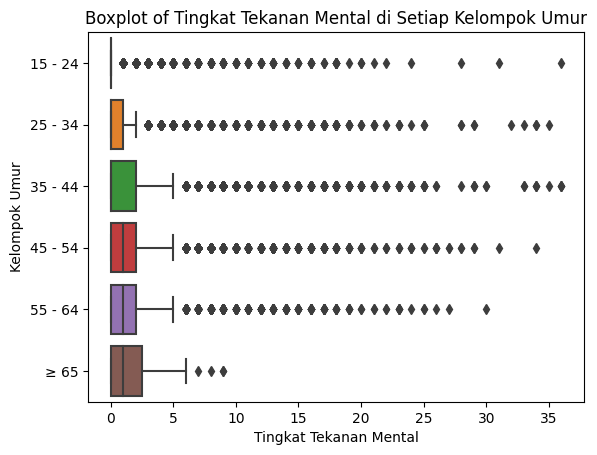

In [ ]:
sns.boxplot(x='kualitas_mental', y='Kelompok Umur', data=combined_mental, orient='h')
plt.xlabel('Tingkat Tekanan Mental')
plt.ylabel('Kelompok Umur')
plt.title('Boxplot of Tingkat Tekanan Mental di Setiap Kelompok Umur')
plt.show()

Cara baca: makin tinggi angka tekanan mental, menunjukkan banyaknya masalah mental yang dialami.
Dari grafik terlihat bahwa semakin tua, tingkat tekanan mental semakin tinggi. Sementara pada usia yang sangat muda hampir tidak ada tekanan mental yang dialami.

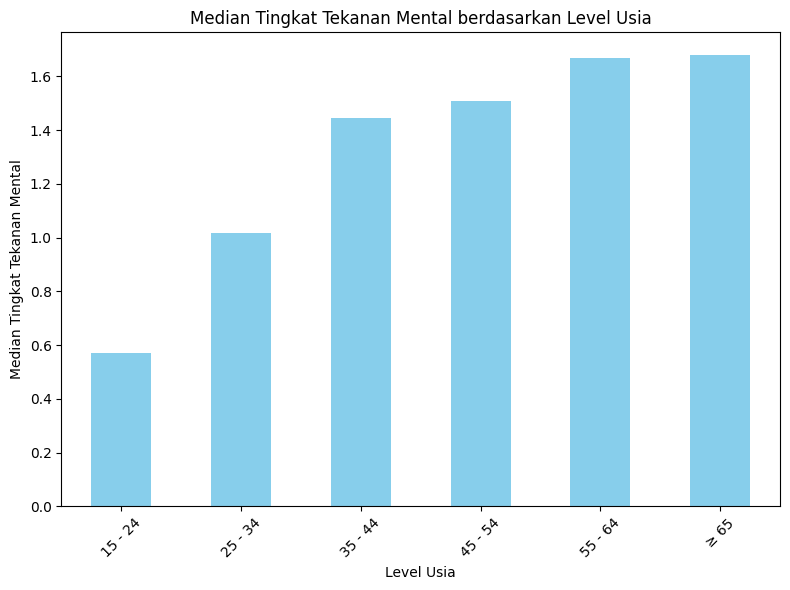

In [ ]:
# Hitung median IMT untuk setiap level usia
mean_mental = combined_mental.groupby('Kelompok Umur')['kualitas_mental'].mean()

# Plot
plt.figure(figsize=(8, 6))
mean_mental.plot(kind='bar', color='skyblue')
plt.title('Median Tingkat Tekanan Mental berdasarkan Level Usia')
plt.xlabel('Level Usia')
plt.ylabel('Median Tingkat Tekanan Mental')
plt.xticks(rotation=45)  # Rotasi label sumbu x agar mudah dibaca
plt.tight_layout()
plt.show()

Dari grafik median di atas semakin terlihat bahwa nilai median untuk tingkat tekanan mental semakin tinggi seiring bertambahnya usia.



Dari grafik berikut terlihat bahw

###Data Lingkungan


In [ ]:
data_lingkungan.head()

,Kelompok Umur,sirkulasirumah,polusiudararumah,sumberair,airminum,jarakjamban,sanitasi,tempatsampah,jaraktempatsampah,faumolahraga
0,25 - 34,Lebih dari 1 sirkulasi udara,Tidak,Air PAM,Tadah hujan,Lebih dari 12 meter,Ada,"Ada, terbuka",Lebih dari 10 meter,Tidak ada
1,35 - 44,Lebih dari 1 sirkulasi udara,Tidak,Air PAM,Air mineral isi ulang,Lebih dari 12 meter,Ada,"Ada, tertutup",Lebih dari 10 meter,Tidak ada
2,15 - 24,Lebih dari 1 sirkulasi udara,Tidak,Air PAM,Air mineral isi ulang,Tidak memiliki jamban sehat,Ada,Tidak ada,Lebih dari 10 meter,Tidak ada
3,35 - 44,Lebih dari 1 sirkulasi udara,Tidak,Air PAM,Tadah hujan,Lebih dari 12 meter,Ada,Tidak ada,Lebih dari 10 meter,Tidak ada
4,45 - 54,Lebih dari 1 sirkulasi udara,Tidak,Air PAM,Air PAM,Lebih dari 12 meter,Ada,"Ada, tertutup",Kurang dari 10 meter,Tidak ada


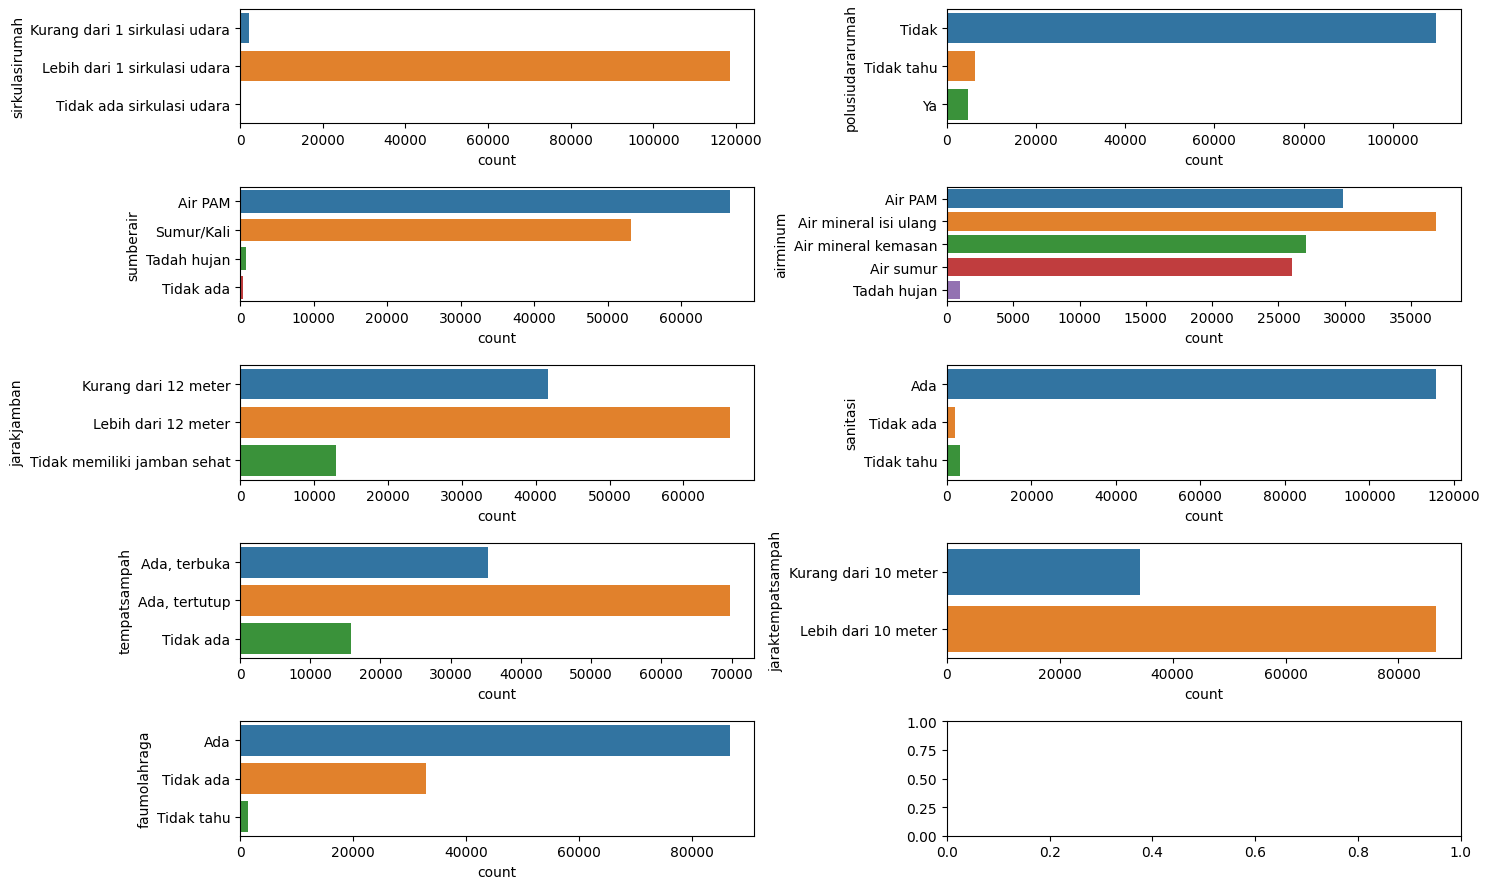

In [ ]:
cols = ['sirkulasirumah', 'polusiudararumah', 'sumberair','airminum','jarakjamban','sanitasi','tempatsampah','jaraktempatsampah','faumolahraga']

# Create subplots
fig, axs = plt.subplots(5, 2, figsize=(15, 9))  # 2 rows, 4 columns for 8 countplots

# Flatten the axis array for easier iteration
axs = axs.flatten()

# Loop through the columns and plot countplots
for i, col in enumerate(cols):
    sns.countplot(y=col, data=data_lingkungan, ax=axs[i])

# Adjust layout for better visualization
plt.tight_layout()

# Show the plot
plt.show()

Dari kedelapan variabel terlihat bahwa yang tiap kategori cukup merata adalah air minum, maka akan kami lakukan penelitian lebih lanjut.

In [ ]:
airminum=data_lingkungan["airminum"]
combine_dataupdate_lingkungan = dataupdate[['WILAYAH']].copy()
combine_dataupdate_lingkungan['airminum'] = airminum
combine_dataupdate_lingkungan.sample(10)

,WILAYAH,airminum
41638,JATENG,Air mineral isi ulang
33689,JATENG,Air mineral kemasan
111595,KALSEL,Air PAM
1151,JATIM,Air mineral kemasan
106582,JABAR,Air mineral kemasan
102475,JATENG,Air PAM
105497,JATENG,Air mineral isi ulang
59551,JAMBI,Air sumur
22249,JABAR,Air sumur
19688,JATIM,Air mineral kemasan


<ipython-input-91-2c2badf81c78>:1: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  percentages = combine_dataupdate_lingkungan.groupby(['WILAYAH', 'airminum']).size().groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).unstack()


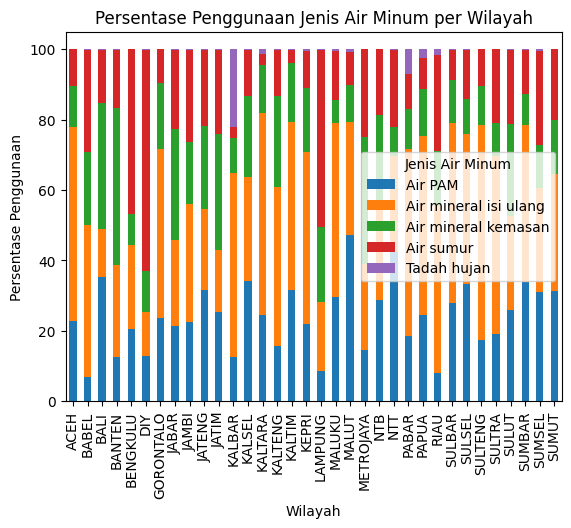

In [ ]:
percentages = combine_dataupdate_lingkungan.groupby(['WILAYAH', 'airminum']).size().groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).unstack()

# Plot barplot
percentages.plot(kind='bar', stacked=True)
plt.title('Persentase Penggunaan Jenis Air Minum per Wilayah')
plt.xlabel('Wilayah')
plt.ylabel('Persentase Penggunaan')
plt.legend(title='Jenis Air Minum')
plt.show()

Terlihat dari grafik pengguna terbanyak untuk setiap jenis air minum adalah:

- Air PAM : Maluku Utara
- Air Mineral Isi Ulang: Hampir Merata di setiap wilayah
- Air Mineral Kemasan: Banten
- Air Sumur: Lampung
- Tadah Hujan : Kalimantan Barat

Sementara itu, untuk pengguna paling sedikit, berikut persebarannya:
- Air PAM : Bangka Belitung, Lampung, dan Riau
- Air Mineral Isi Ulang : Bali
- Air Mineral Kemasan : Maluku dan Bengkulu
- Air Sumur : Kalbar, Kaltara, dan Kaltim
- Tadah Hujan : Banyak wilayah yang tidak menggunakan tadah hujan

In [ ]:
sumberair=data_lingkungan["sumberair"]
combine_dataupdate_lingkungan2 = dataupdate[['WILAYAH']].copy()
combine_dataupdate_lingkungan2['sumberair'] = sumberair
combine_dataupdate_lingkungan2.head()

,WILAYAH,sumberair
0,KALBAR,Air PAM
1,KALBAR,Air PAM
2,KALBAR,Air PAM
3,KALBAR,Air PAM
4,SULSEL,Air PAM


<ipython-input-93-b3eb0bc4622e>:1: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  persentase_sumberair = combine_dataupdate_lingkungan2.groupby(['WILAYAH', 'sumberair']).size().groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).unstack()


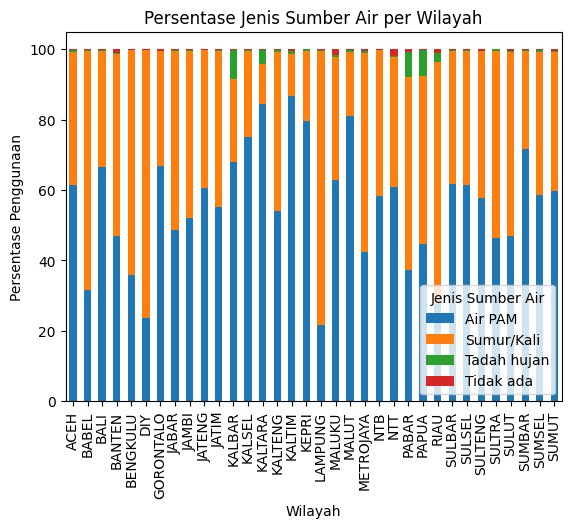

In [ ]:
persentase_sumberair = combine_dataupdate_lingkungan2.groupby(['WILAYAH', 'sumberair']).size().groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).unstack()

# Plot barplot
persentase_sumberair.plot(kind='bar', stacked=True)
plt.title('Persentase Jenis Sumber Air per Wilayah')
plt.xlabel('Wilayah')
plt.ylabel('Persentase Penggunaan')
plt.legend(title='Jenis Sumber Air')
plt.show()

Persebaran Jenis Sumber Air Terbanyak:
- Air PAM : Kalimatan Timur
- Air Sumur/kali :

###Data Status

In [ ]:
data_status.head()

,Kelompok Umur,NILAI IMT,IMT,JENIS KELAMIN,USIA,LAMA BERDINAS,PENDIDIKAN TERAKHIR,TINGGI BADAN,BERAT BADAN,LINGKAR PINGGANG,Status Perkawinan,PENGELUARAN/BULAN
0,25 - 34,29.80,Obesitas,LAKI - LAKI,34.00,16.00,SMA,168.90,85.00,100.00,Menikah,Rp. 7 Juta s.d. 10 Juta
1,35 - 44,24.36,Normal,LAKI - LAKI,43.00,23.00,SMA,169.50,70.00,80.00,Menikah,Rp. 2 Juta s.d. 6 Juta
2,15 - 24,20.88,Normal,LAKI - LAKI,21.00,1.00,SMA,169.50,60.00,78.00,Belum Menikah,Rp. 2 Juta s.d. 6 Juta
3,35 - 44,25.01,Gemuk,LAKI - LAKI,41.00,20.00,S1,168.50,71.00,90.00,Menikah,Rp. 2 Juta s.d. 6 Juta
4,45 - 54,24.20,Normal,LAKI - LAKI,50.00,20.00,SMA,172.50,72.00,85.00,Menikah,Rp. 2 Juta s.d. 6 Juta


In [ ]:
data_status1=data_status[["Kelompok Umur","IMT","JENIS KELAMIN","PENDIDIKAN TERAKHIR","Status Perkawinan", "PENGELUARAN/BULAN"]]
data_status2=data_status[["Kelompok Umur","NILAI IMT", "USIA","LAMA BERDINAS","TINGGI BADAN","BERAT BADAN","LINGKAR PINGGANG"]]

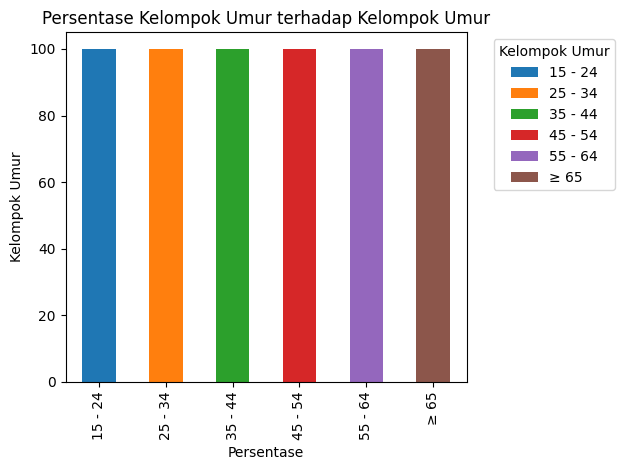

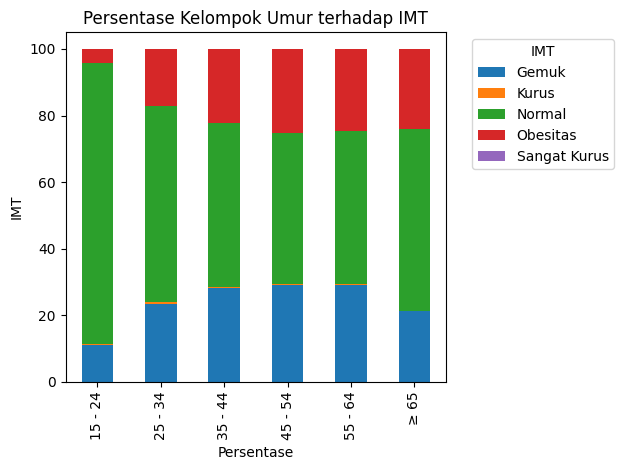

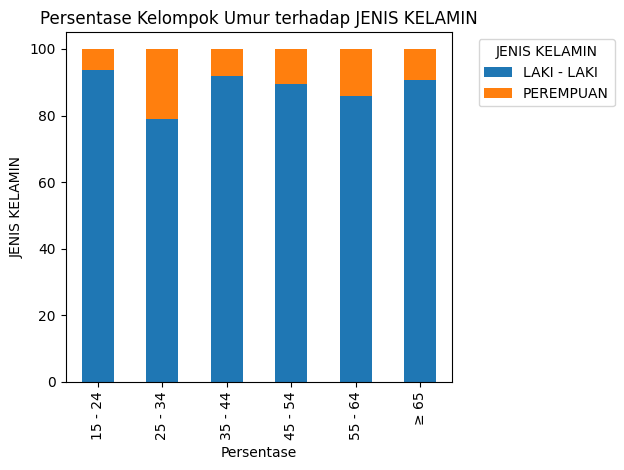

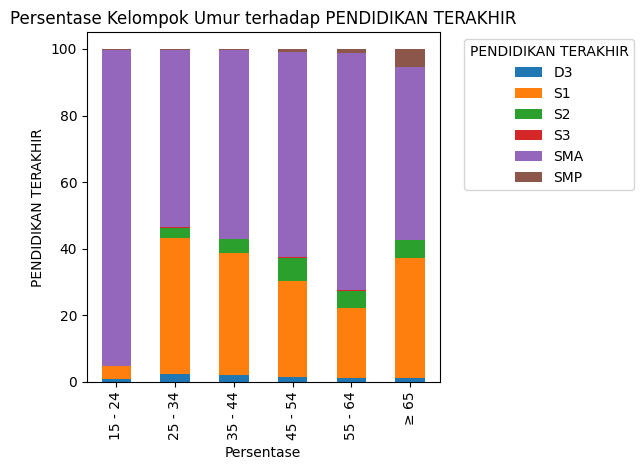

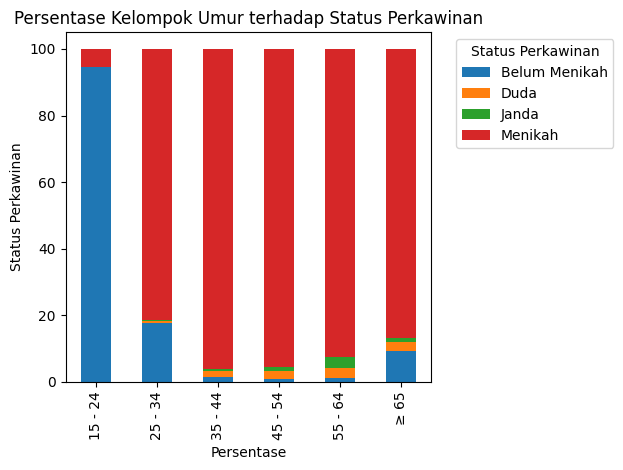

In [ ]:
for col in data_status1.columns[:-1]:  # Mengambil semua kolom kecuali target_variable
    cross_tab = pd.crosstab(data_status1['Kelompok Umur'], data_status1[col], normalize='index') * 100
    cross_tab.plot(kind='bar', stacked=True)
    plt.title(f'Persentase Kelompok Umur terhadap {col}')
    plt.xlabel('Persentase')
    plt.ylabel(col)
    plt.legend(title=col, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

Kesimpulan yang dapat diambil:
- Usia 15-24 memiliki persentase IMT normal terbesar dibandingkan usia lainnya
- Di usia 35 hingga 64 tahun persentase menikahnya sangat besar
- Usia 25-34 merupakan pemilik gelar S1 terbanyak
-

In [ ]:
data_status2.head()

,Kelompok Umur,NILAI IMT,USIA,LAMA BERDINAS,TINGGI BADAN,BERAT BADAN,LINGKAR PINGGANG
0,25 - 34,29.80,34.00,16.00,168.90,85.00,100.00
1,35 - 44,24.36,43.00,23.00,169.50,70.00,80.00
2,15 - 24,20.88,21.00,1.00,169.50,60.00,78.00
3,35 - 44,25.01,41.00,20.00,168.50,71.00,90.00
4,45 - 54,24.20,50.00,20.00,172.50,72.00,85.00


<ipython-input-98-8c11017fa360>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data_status2.corr(), annot=True, cmap='coolwarm', fmt='.2f')


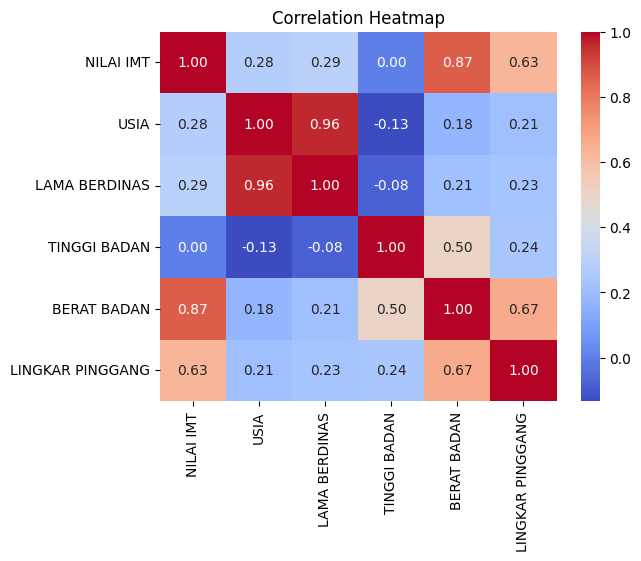

In [ ]:
sns.heatmap(data_status2.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

- Berat Badan memiliki korelasi tinggi terhadap Nilai IMT secara positif
- Tinggi Badan memiliki korelasi negatif terhadap Usia
- Usia dan Lama Berdinas memiliki korelasi yang tinggi

In [ ]:
data_status['PENGELUARAN/BULAN'].value_counts()

Rp. 2 Juta s.d. 6 Juta      103668
Rp. 7 Juta s.d. 10 Juta      15711
Rp. 11 Juta s.d. 14 Juta      1154
Di atas Rp. 15 Juta            341
Name: PENGELUARAN/BULAN, dtype: int64

<Axes: xlabel='USIA', ylabel='IMT'>

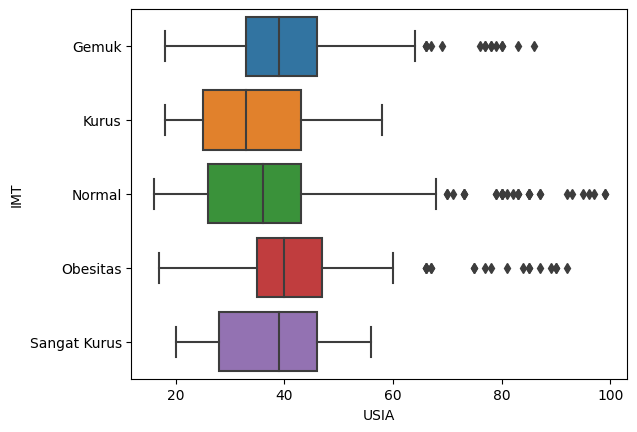

In [ ]:
#Grafik Hubungan Umur dengan Status
sns.boxplot(x="USIA", y="IMT", data=data_status)

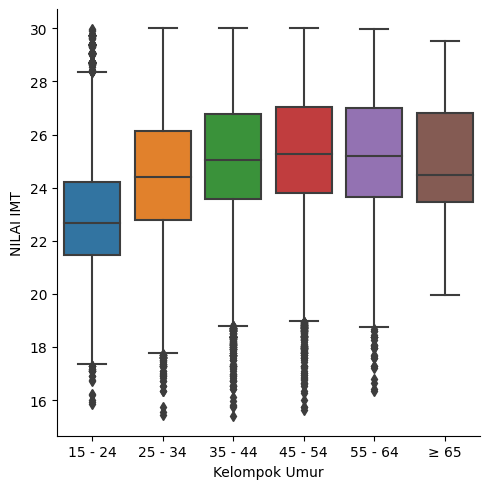

In [ ]:
#Melihat nilai IMT dari tiap kelompok umur
sns.catplot(data=data_status, x="Kelompok Umur", y="NILAI IMT", kind="box")
plt.show()

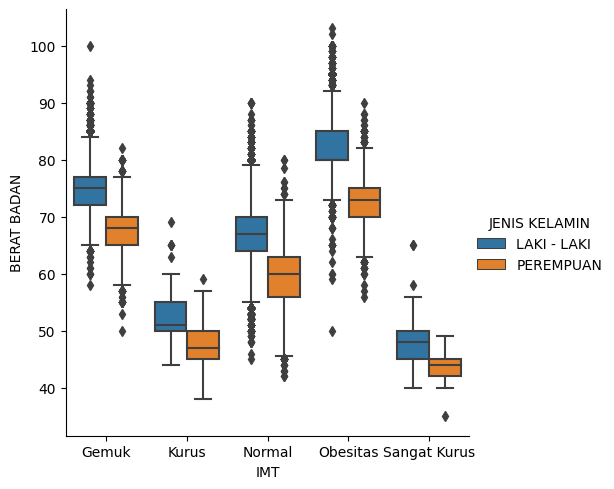

In [ ]:
#Melihat berat badan berdasarkan data IMT dan jenis kelamin
sns.catplot(data=data_status, x="IMT", y="BERAT BADAN", hue = 'JENIS KELAMIN', kind="box")
plt.show()

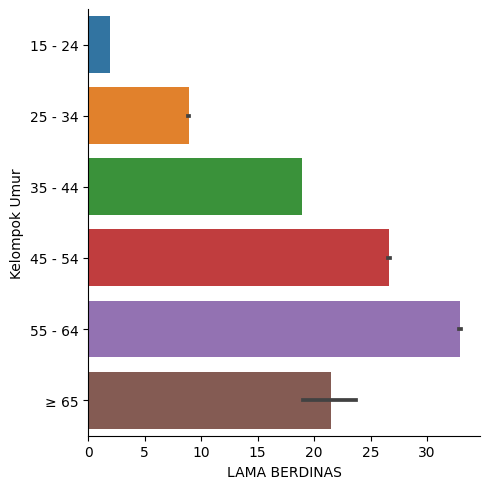

In [ ]:
#Melihat lamanya berdinas berdasarkan kelompok umur
sns.catplot(data_status, x="LAMA BERDINAS", y = "Kelompok Umur", kind = "bar")
plt.show()

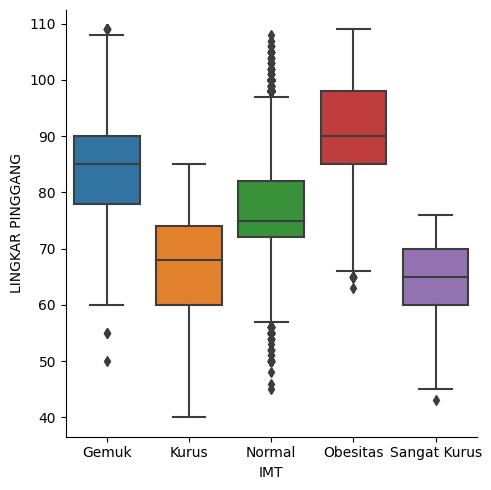

In [ ]:
#Melihat rentang ukur lingkar pinggang berdasarkan IMT
sns.catplot(data=data_status, x="IMT", y="LINGKAR PINGGANG", kind="box")
plt.show()

###Data Kondisi

In [ ]:
data_kondisi.head()

,Kelompok Umur,karies,gigikaries,olahraga,konsumair,konsumbuah,mandi,waktumandi,rokok,jumlahrokok,gula,alkohol,junkfood,gosokgigi,waktugosokgigi,pakaiandalam,cucitangan
0,25 - 34,Tidak,NaN,4 kali atau lebih dalam seminggu,Lebih dari 2 liter,Kurang dari 400gr,> 2 Kali,2 - 5 menit,Ya,Dibawah 1 bungkus/perhari,Kurang dari 6 sendok teh,Tidak pernah,1 - 2 kali/hari,> 2 Kali,1 - 2 menit,2 Kali,Selalu
1,35 - 44,Tidak,NaN,4 kali atau lebih dalam seminggu,Lebih dari 2 liter,Kurang dari 400gr,2 Kali,> 5 menit,Tidak,NaN,Tidak pernah,Tidak pernah,Tidak pernah,2 Kali,Di atas 3 menit,> 2 Kali,Selalu
2,15 - 24,Tidak,NaN,4 kali atau lebih dalam seminggu,2 Liter,400gr/lebih,2 Kali,2 - 5 menit,Tidak,NaN,Kurang dari 6 sendok teh,Tidak pernah,1 - 2 kali/hari,2 Kali,1 - 2 menit,2 Kali,Selalu
3,35 - 44,Ya,1 - 3 gigi karies/berlubang,4 kali atau lebih dalam seminggu,Lebih dari 2 liter,Kurang dari 400gr,2 Kali,2 - 5 menit,Tidak,NaN,Kurang dari 6 sendok teh,Tidak pernah,1 - 2 kali/hari,2 Kali,1 - 2 menit,2 Kali,Selalu
4,45 - 54,Ya,1 - 3 gigi karies/berlubang,Kurang dari 4 kali dalam seminggu,Kurang dari 2 Liter,400gr/lebih,2 Kali,> 5 menit,Tidak,NaN,Kurang dari 6 sendok teh,Tidak pernah,Tidak pernah,2 Kali,1 - 2 menit,2 Kali,Selalu


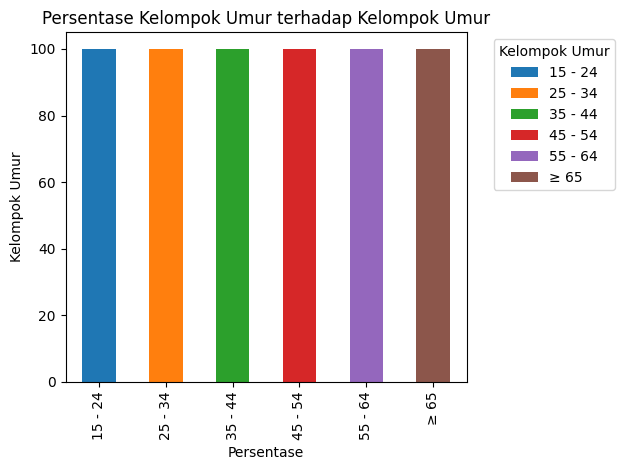

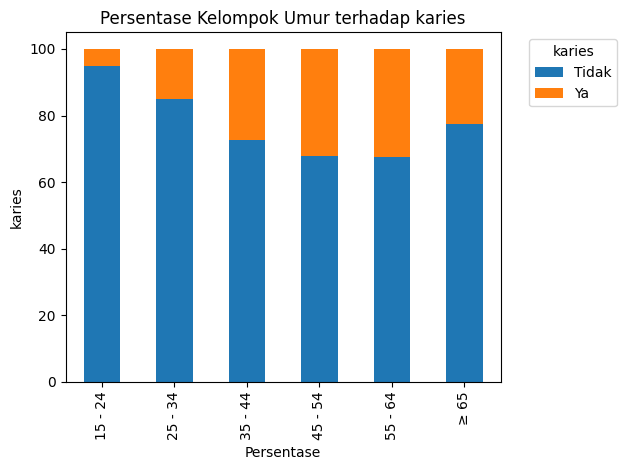

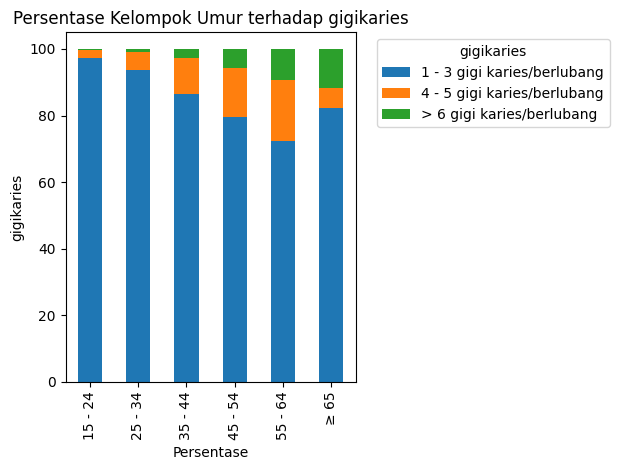

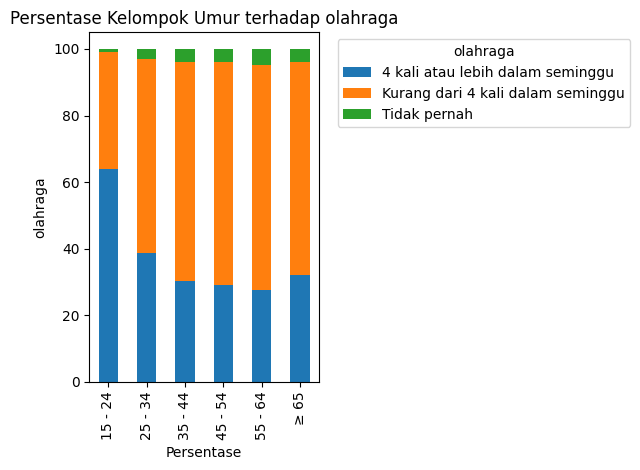

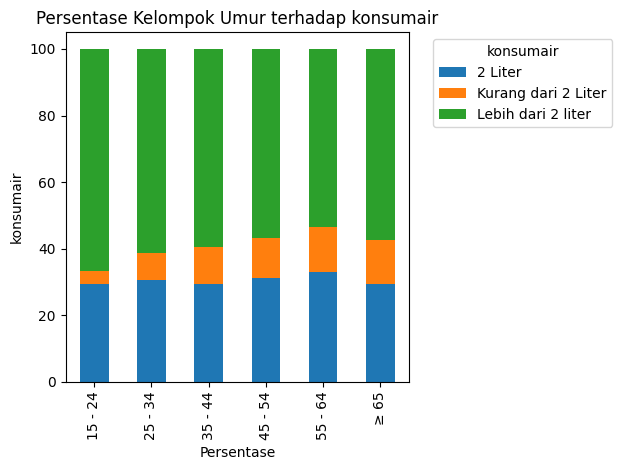

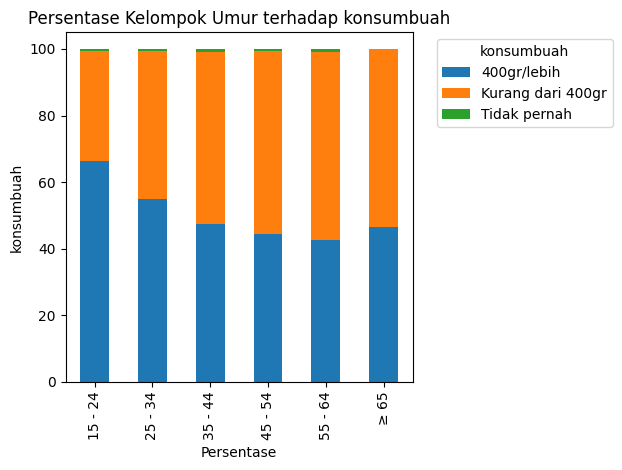

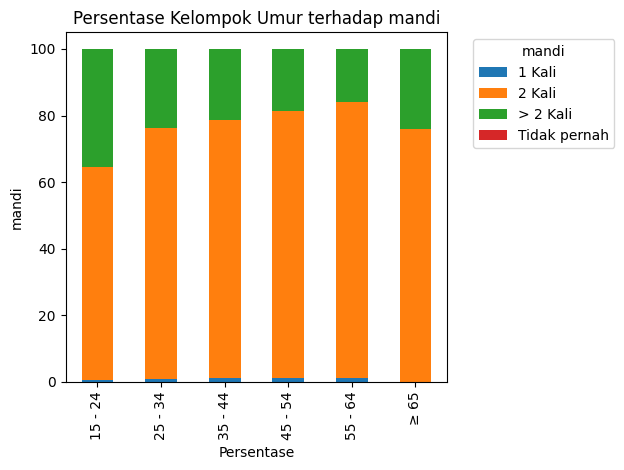

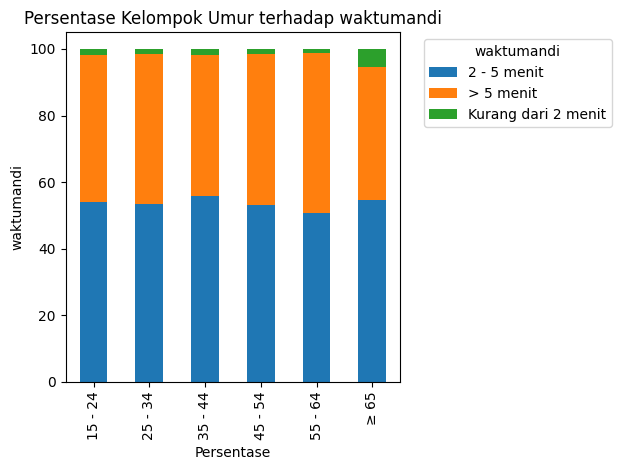

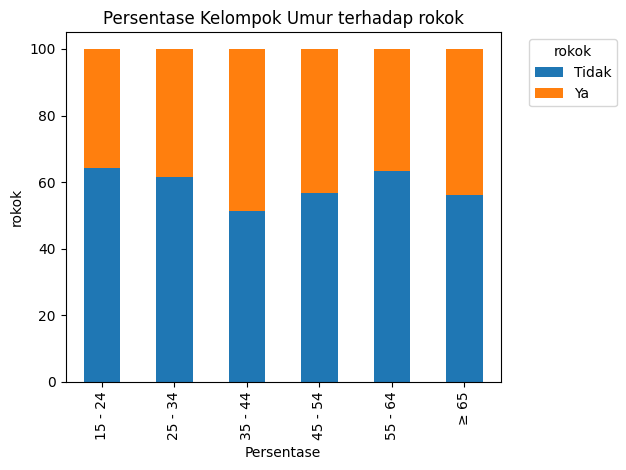

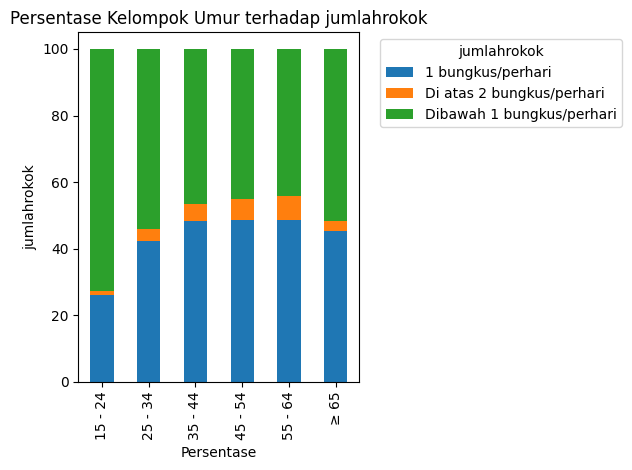

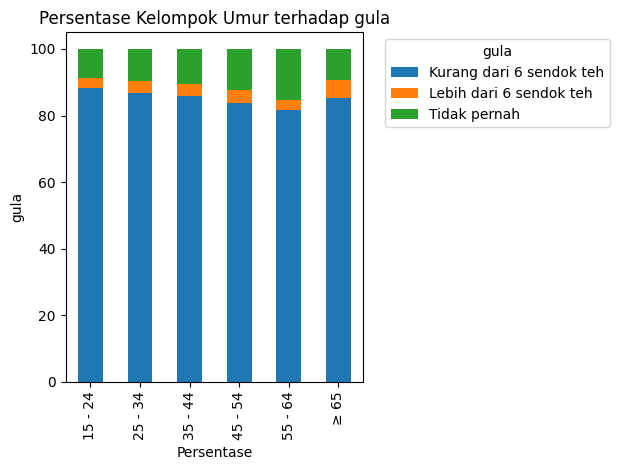

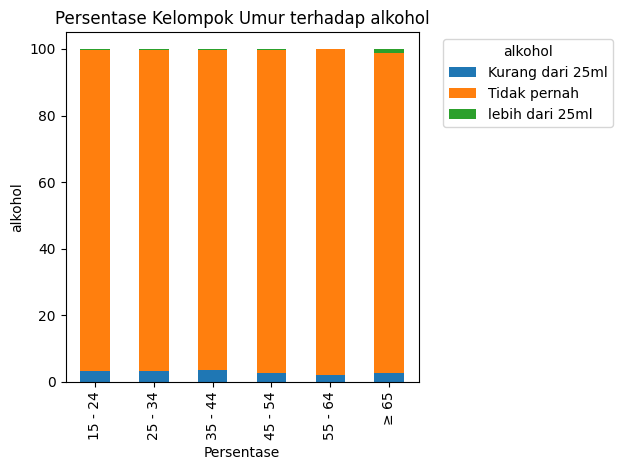

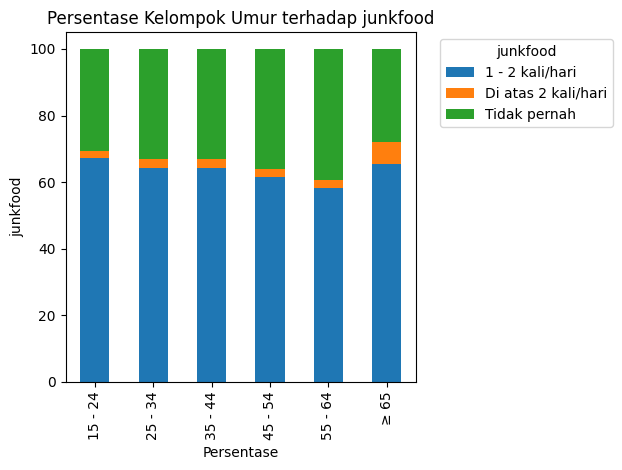

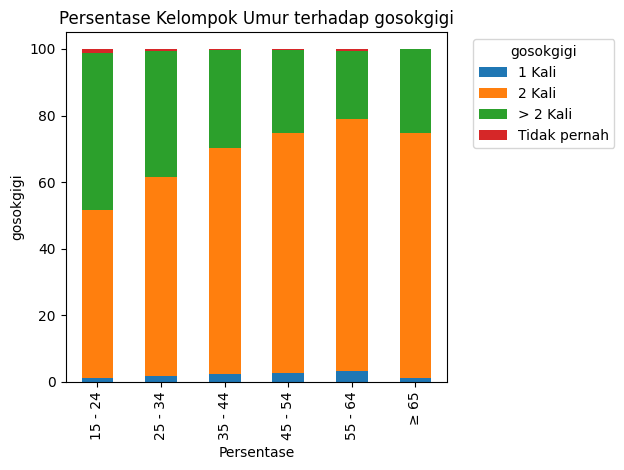

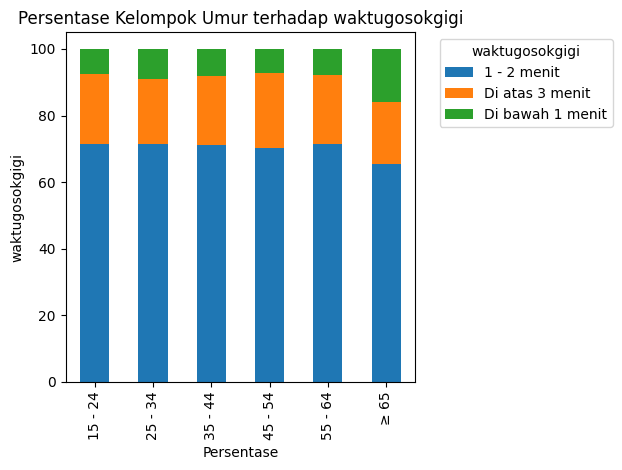

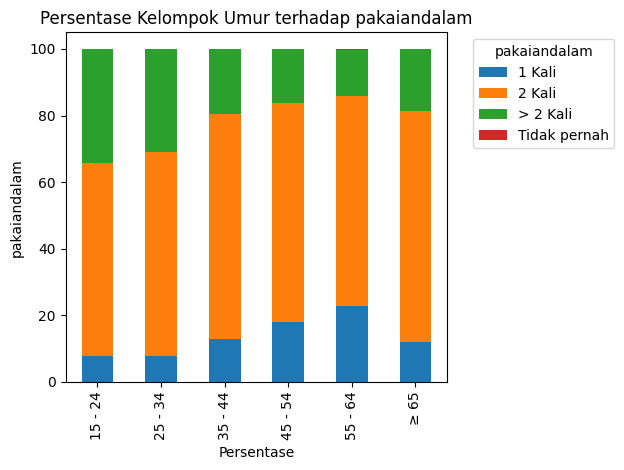

In [ ]:
for col in data_kondisi.columns[:-1]:  # Mengambil semua kolom kecuali target_variable
    cross_tab = pd.crosstab(data_kondisi['Kelompok Umur'], data_kondisi[col], normalize='index') * 100
    cross_tab.plot(kind='bar', stacked=True)
    plt.title(f'Persentase Kelompok Umur terhadap {col}')
    plt.xlabel('Persentase')
    plt.ylabel(col)
    plt.legend(title=col, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

Tidak ada perbedaan yang bermakna di setiap kelompok umur untuk setiap kondisi yang dialami

## Data Mining

###CLUSTERING DATA STATUS

In [ ]:
data_status.head()

,Kelompok Umur,NILAI IMT,IMT,JENIS KELAMIN,USIA,LAMA BERDINAS,PENDIDIKAN TERAKHIR,TINGGI BADAN,BERAT BADAN,LINGKAR PINGGANG,Status Perkawinan,PENGELUARAN/BULAN
0,25 - 34,29.80,Obesitas,LAKI - LAKI,34.00,16.00,SMA,168.90,85.00,100.00,Menikah,Rp. 7 Juta s.d. 10 Juta
1,35 - 44,24.36,Normal,LAKI - LAKI,43.00,23.00,SMA,169.50,70.00,80.00,Menikah,Rp. 2 Juta s.d. 6 Juta
2,15 - 24,20.88,Normal,LAKI - LAKI,21.00,1.00,SMA,169.50,60.00,78.00,Belum Menikah,Rp. 2 Juta s.d. 6 Juta
3,35 - 44,25.01,Gemuk,LAKI - LAKI,41.00,20.00,S1,168.50,71.00,90.00,Menikah,Rp. 2 Juta s.d. 6 Juta
4,45 - 54,24.20,Normal,LAKI - LAKI,50.00,20.00,SMA,172.50,72.00,85.00,Menikah,Rp. 2 Juta s.d. 6 Juta


In [ ]:
# Pilih kolom-kolom yang ingin disertakan di DataFrame baru
selected_columns = ['Kelompok Umur', 'IMT','JENIS KELAMIN','PENDIDIKAN TERAKHIR','Status Perkawinan','PENGELUARAN/BULAN']

# Buat DataFrame baru dari kolom-kolom yang dipilih
dfs = data_status[selected_columns].copy()

# Tampilkan DataFrame barudf
dfs.head()

,Kelompok Umur,IMT,JENIS KELAMIN,PENDIDIKAN TERAKHIR,Status Perkawinan,PENGELUARAN/BULAN
0,25 - 34,Obesitas,LAKI - LAKI,SMA,Menikah,Rp. 7 Juta s.d. 10 Juta
1,35 - 44,Normal,LAKI - LAKI,SMA,Menikah,Rp. 2 Juta s.d. 6 Juta
2,15 - 24,Normal,LAKI - LAKI,SMA,Belum Menikah,Rp. 2 Juta s.d. 6 Juta
3,35 - 44,Gemuk,LAKI - LAKI,S1,Menikah,Rp. 2 Juta s.d. 6 Juta
4,45 - 54,Normal,LAKI - LAKI,SMA,Menikah,Rp. 2 Juta s.d. 6 Juta


In [ ]:
#heatmap
!pip install dython
from dython import nominal

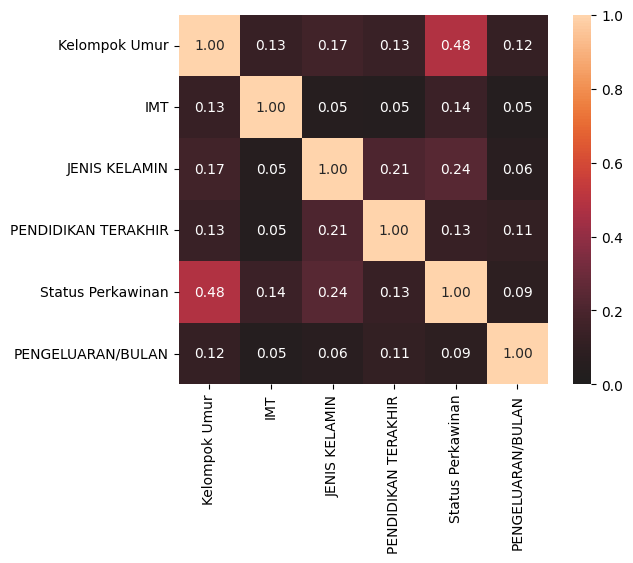

{'corr':                      Kelompok Umur  IMT  JENIS KELAMIN  PENDIDIKAN TERAKHIR  \
 Kelompok Umur                 1.00 0.13           0.17                 0.13   
 IMT                           0.13 1.00           0.05                 0.05   
 JENIS KELAMIN                 0.17 0.05           1.00                 0.21   
 PENDIDIKAN TERAKHIR           0.13 0.05           0.21                 1.00   
 Status Perkawinan             0.48 0.14           0.24                 0.13   
 PENGELUARAN/BULAN             0.12 0.05           0.06                 0.11   
 
                      Status Perkawinan  PENGELUARAN/BULAN  
 Kelompok Umur                     0.48               0.12  
 IMT                               0.14               0.05  
 JENIS KELAMIN                     0.24               0.06  
 PENDIDIKAN TERAKHIR               0.13               0.11  
 Status Perkawinan                 1.00               0.09  
 PENGELUARAN/BULAN                 0.09               1.00  ,
 '

In [ ]:
from dython.nominal import associations
associations(dfs)

In [ ]:
#Assigning/Replacing each category with a number
dfs_mapped = dfs.copy()
dfs_mapped['Kelompok Umur']= dfs_mapped['Kelompok Umur'].map({'15 - 24':0, '25 - 34':1, '35 - 44':2, '45 - 54':3, '55 - 64':4, '≥ 65':5})
dfs_mapped['IMT']= dfs_mapped['IMT'].map({'Sangat Kurus':0, 'Kurus':1, 'Normal':2, 'Gemuk':3,'Obesitas':4})
dfs_mapped['JENIS KELAMIN']= dfs_mapped['JENIS KELAMIN'].map({'PEREMPUAN':1, 'LAKI - LAKI':0})
dfs_mapped['PENDIDIKAN TERAKHIR']=dfs_mapped['PENDIDIKAN TERAKHIR'].map({'SMP':0,'SMA':1,'D3':2,'S1':3,'S2':4,'S3':5})
dfs_mapped['Status Perkawinan']= dfs_mapped['Status Perkawinan'].map({'Belum Menikah':0, 'Menikah':1, 'Janda':2, 'Duda':3})
dfs_mapped['PENGELUARAN/BULAN']= dfs_mapped['PENGELUARAN/BULAN'].map({'Rp. 2 Juta s.d. 6 Juta':0, 'Rp. 7 Juta s.d. 10 Juta':1,'Rp. 11 Juta s.d. 14 Juta':2,'Di atas Rp. 15 Juta':3})
dfs_mapped_cluster = dfs_mapped.replace(np.nan, 0)

dfs_mapped_cluster.head()

,Kelompok Umur,IMT,JENIS KELAMIN,PENDIDIKAN TERAKHIR,Status Perkawinan,PENGELUARAN/BULAN
0,1,4,0,1,1,1
1,2,2,0,1,1,0
2,0,2,0,1,0,0
3,2,3,0,3,1,0
4,3,2,0,1,1,0


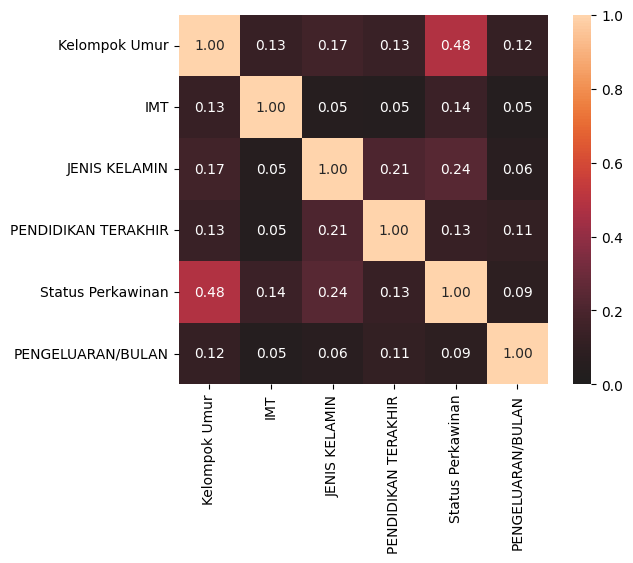

{'corr':                      Kelompok Umur  IMT  JENIS KELAMIN  PENDIDIKAN TERAKHIR  \
 Kelompok Umur                 1.00 0.13           0.17                 0.13   
 IMT                           0.13 1.00           0.05                 0.05   
 JENIS KELAMIN                 0.17 0.05           1.00                 0.21   
 PENDIDIKAN TERAKHIR           0.13 0.05           0.21                 1.00   
 Status Perkawinan             0.48 0.14           0.24                 0.13   
 PENGELUARAN/BULAN             0.12 0.05           0.06                 0.11   
 
                      Status Perkawinan  PENGELUARAN/BULAN  
 Kelompok Umur                     0.48               0.12  
 IMT                               0.14               0.05  
 JENIS KELAMIN                     0.24               0.06  
 PENDIDIKAN TERAKHIR               0.13               0.11  
 Status Perkawinan                 1.00               0.09  
 PENGELUARAN/BULAN                 0.09               1.00  ,
 '

In [ ]:
from dython.nominal import associations
associations(dfs_mapped_cluster)

In [ ]:
 #clustering analysis.
 #import KMeans
from sklearn.cluster import KMeans

In [ ]:
kmeans = KMeans(2)

In [ ]:
x = dfs_mapped_cluster.iloc[:,:]
x

,Kelompok Umur,IMT,JENIS KELAMIN,PENDIDIKAN TERAKHIR,Status Perkawinan,PENGELUARAN/BULAN
0,1,4,0,1,1,1
1,2,2,0,1,1,0
2,0,2,0,1,0,0
3,2,3,0,3,1,0
4,3,2,0,1,1,0
...,...,...,...,...,...,...
120869,1,2,0,1,1,0
120870,3,2,0,1,1,0
120871,0,2,0,1,1,0
120872,3,2,1,1,1,0


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

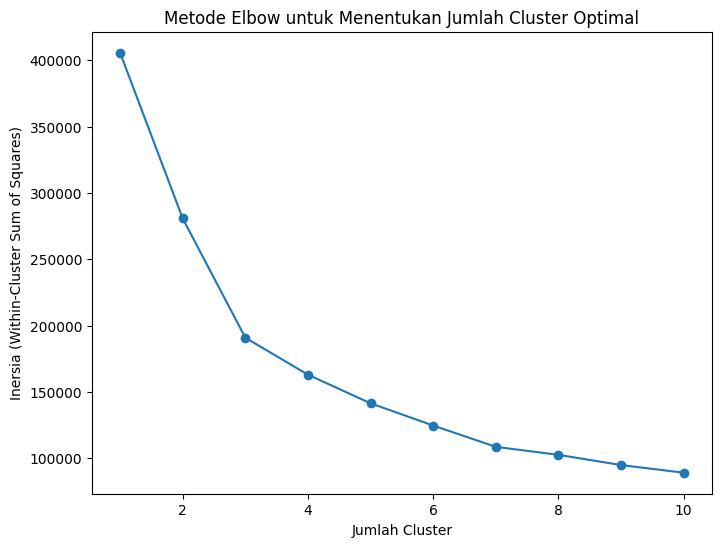

In [ ]:
# Menyimpan nilai inersia untuk berbagai jumlah cluster
inertia_values = []

# Coba jumlah cluster dari 1 hingga 10
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x)
    inertia_values.append(kmeans.inertia_)

# Plotting metode Elbow
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia_values, marker='o')
plt.title('Metode Elbow untuk Menentukan Jumlah Cluster Optimal')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Inersia (Within-Cluster Sum of Squares)')
plt.show()

In [ ]:
kmeans = KMeans(3)

In [ ]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 0, 1, ..., 1, 0, 0], dtype=int32)

In [ ]:
kmeans.fit(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [ ]:
#Add cluster to column
data_with_clusters = x.copy()
data_with_clusters['Clusters'] = identified_clusters
data_with_clusters

,Kelompok Umur,IMT,JENIS KELAMIN,PENDIDIKAN TERAKHIR,Status Perkawinan,PENGELUARAN/BULAN,Clusters
0,1,4,0,1,1,1,1
1,2,2,0,1,1,0,0
2,0,2,0,1,0,0,1
3,2,3,0,3,1,0,2
4,3,2,0,1,1,0,0
...,...,...,...,...,...,...,...
120869,1,2,0,1,1,0,1
120870,3,2,0,1,1,0,0
120871,0,2,0,1,1,0,1
120872,3,2,1,1,1,0,0


In [ ]:
data_with_clusters['Clusters'] = data_with_clusters['Clusters'].astype('category')

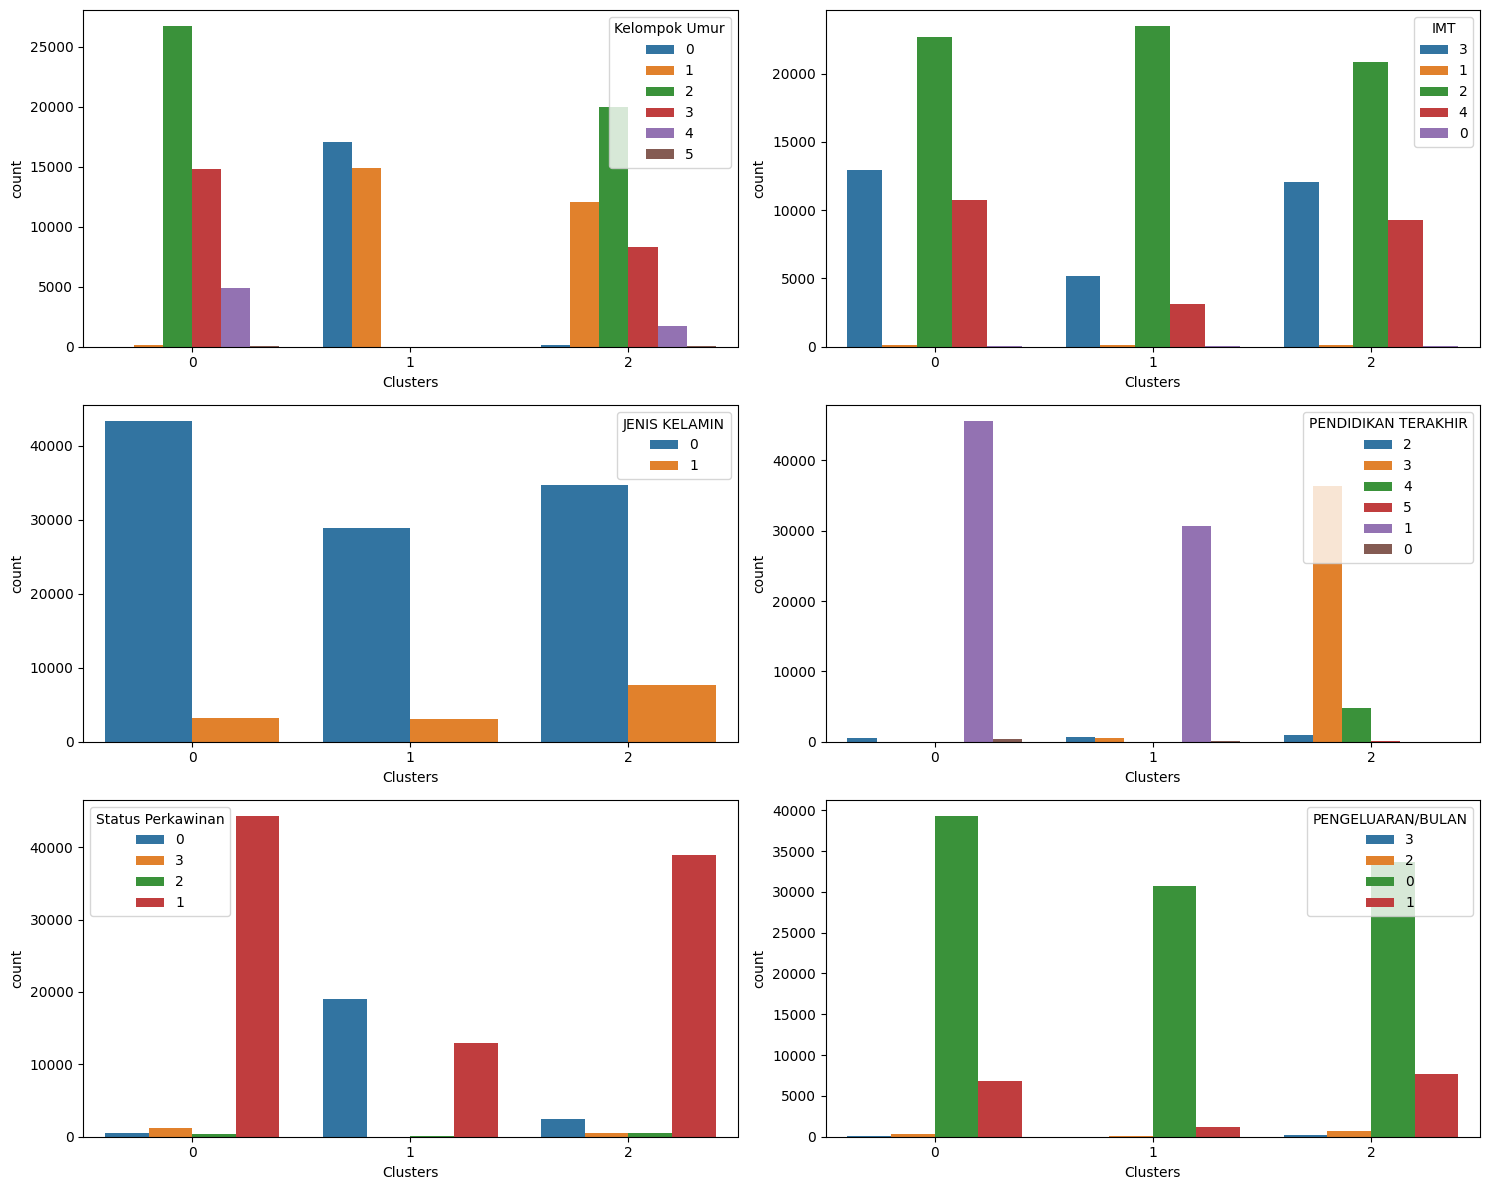

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

cols = ['Kelompok Umur', 'IMT', 'JENIS KELAMIN', 'PENDIDIKAN TERAKHIR', 'Status Perkawinan', 'PENGELUARAN/BULAN']

# Create subplots
fig, axs2 = plt.subplots(3, 2, figsize=(15, 12))  # 3 rows, 2 columns for 6 countplots

# Flatten the axis array for easier iteration
axs2 = axs2.flatten()

# Loop through the columns and plot countplots
for i, col in enumerate(cols):
    sns.countplot(x='Clusters', hue=col, data=data_with_clusters, ax=axs2[i])

# Adjust layout for better visualization
plt.tight_layout()

# Show the plot
plt.show()

###CLUSTERING WITH HEALTH RATE, DAN MENTAL RATE

In [ ]:
# Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
data_sakit.head()

,JANTUNG,STROKE,DIABETES,HIPERTENSI,KANKER,GINJAL,TUMOR,OSTEO,LAMBUNG,LIVER,...,DBD,COVID-19,HIV/AIDS,DIARE,MALARIA,GONORE/SIPILIS,THYPUS,DERMATITIS,MIKOSIS,RowSum
0,0,0,0,0,0,0,0,0,1,0,...,0,1,0,1,0,0,0,1,0,4
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,2


In [ ]:
data_mental2.head()

,sakitkepala,tidaknafsu,sulittidur,takut,cemas,gemetar,pencernaan,sulitpikiranjernih,tidakbahagia,seringmenangis,...,sulitambilkeputusan,pekerjaanterganggu,bermanfaat,hilangminat,tidakberharga,suicide,lelah,tidakenakperut,mudahlelah,RowSum
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.00
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.00
2,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2.00
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.00
4,1,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,3.00


In [ ]:
df_gabung = x.copy()

In [ ]:
df_gabung = df_gabung.assign(HealthRate=data_sakit['RowSum'])
df_gabung = df_gabung.assign(MentalRate=data_mental2['RowSum'])
df_gabung

,Kelompok Umur,IMT,JENIS KELAMIN,PENDIDIKAN TERAKHIR,Status Perkawinan,PENGELUARAN/BULAN,HealthRate,MentalRate
0,1,4,0,1,1,1,4,1.00
1,2,2,0,1,1,0,0,0.00
2,0,2,0,1,0,0,1,2.00
3,2,3,0,3,1,0,1,1.00
4,3,2,0,1,1,0,2,3.00
...,...,...,...,...,...,...,...,...
120869,1,2,0,1,1,0,1,0.00
120870,3,2,0,1,1,0,2,0.00
120871,0,2,0,1,1,0,0,0.00
120872,3,2,1,1,1,0,1,1.00


In [ ]:
#Standardize

In [ ]:
col_names = ['HealthRate', 'MentalRate']
features = df_gabung[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
scaled_features = pd.DataFrame(features, columns = col_names)
scaled_features.head()

,HealthRate,MentalRate
0,3.05,-0.10
1,-0.55,-0.51
2,0.35,0.31
3,0.35,-0.10
4,1.25,0.71


In [ ]:
df_gabung['HealthRate']=scaled_features['HealthRate']
df_gabung['MentalRate']=scaled_features['MentalRate']
df_gabung

,Kelompok Umur,IMT,JENIS KELAMIN,PENDIDIKAN TERAKHIR,Status Perkawinan,PENGELUARAN/BULAN,HealthRate,MentalRate
0,1,4,0,1,1,1,3.05,-0.10
1,2,2,0,1,1,0,-0.55,-0.51
2,0,2,0,1,0,0,0.35,0.31
3,2,3,0,3,1,0,0.35,-0.10
4,3,2,0,1,1,0,1.25,0.71
...,...,...,...,...,...,...,...,...
120869,1,2,0,1,1,0,0.35,-0.51
120870,3,2,0,1,1,0,1.25,-0.51
120871,0,2,0,1,1,0,-0.55,-0.51
120872,3,2,1,1,1,0,0.35,-0.10


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0, 0.5, 'Inertia')

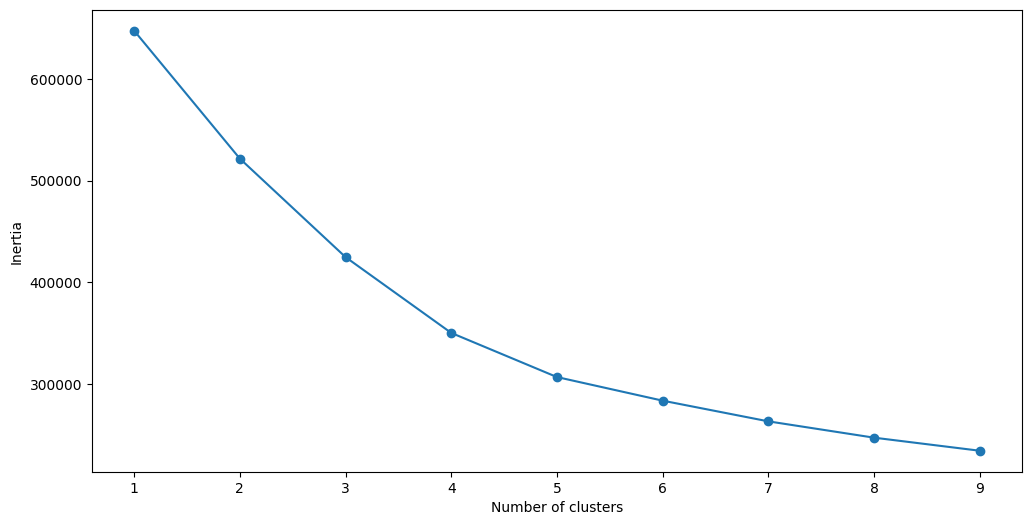

In [ ]:
#Building The Clustering Model
SSE = []

for cluster in range(1,10):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(df_gabung)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them

frame = pd.DataFrame({'Cluster':range(1,10), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [ ]:
# First, build a model with 4 clusters

kmeans = KMeans(n_clusters = 3, init='k-means++')
kmeans.fit(df_gabung)

# Now, print the silhouette score of this model

print(silhouette_score(df_gabung, kmeans.labels_, metric='euclidean'))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.25825922795162737


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


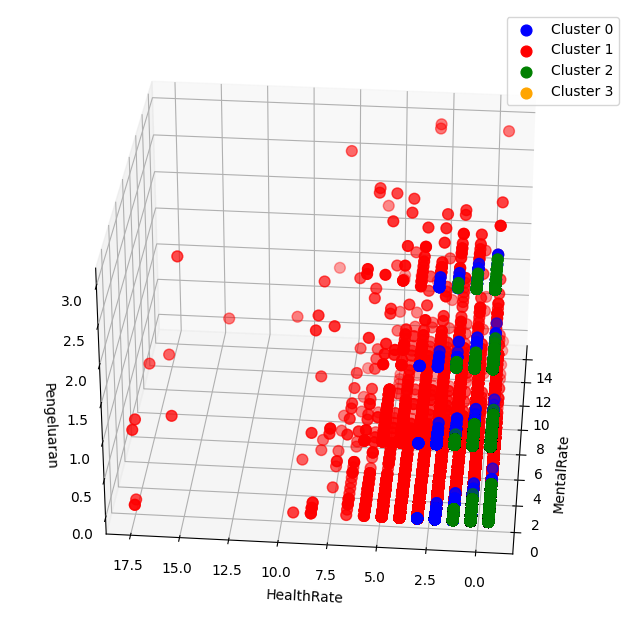

In [ ]:
clusters = kmeans.fit_predict(df_gabung.iloc[:,1:])
df_gabung["label"] = clusters

# Visualisasi 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

colors = ['blue', 'red', 'green', 'orange']

for label, color in zip(range(4), colors):
    ax.scatter(
        df_gabung['MentalRate'][df_gabung['label'] == label],
        df_gabung['HealthRate'][df_gabung['label'] == label],
        df_gabung['PENGELUARAN/BULAN'][df_gabung['label'] == label],
        c=color, s=60, label=f'Cluster {label}'
    )

ax.set_xlabel('MentalRate')
ax.set_ylabel('HealthRate')
ax.set_zlabel('Pengeluaran')
ax.legend()
ax.view_init(30, 185)
plt.show()

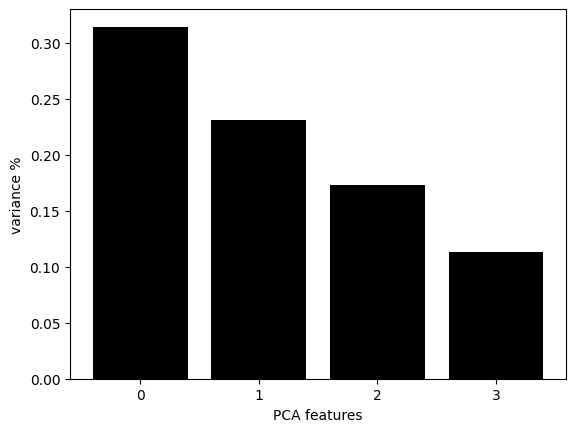

In [ ]:
#Model 2 dengan PCA
pca = PCA(n_components=4)
principalComponents = pca.fit_transform(df_gabung)

features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)

PCA_components = pd.DataFrame(principalComponents)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

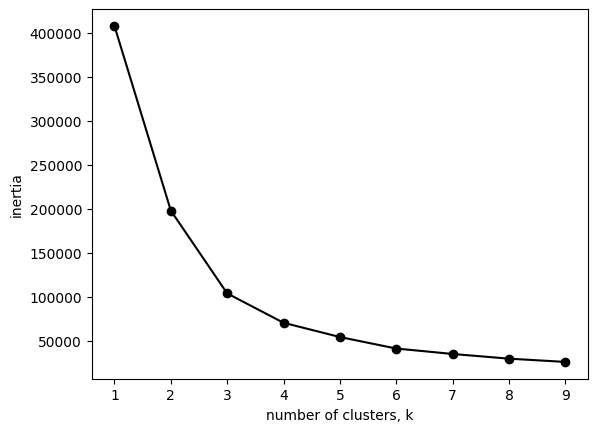

In [ ]:
ks = range(1, 10)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(PCA_components.iloc[:,:2])
    inertias.append(model.inertia_)

plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [ ]:
model = KMeans(n_clusters=3)
model.fit(PCA_components.iloc[:,:2])

# silhouette score
print(silhouette_score(PCA_components.iloc[:,:2], model.labels_, metric='euclidean'))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.5597704302389813


In [ ]:
# map back clusters to dataframe
pred = model.predict(PCA_components.iloc[:,:2])
frame = pd.DataFrame(df_gabung)
frame['cluster'] = pred
frame.head()

,Kelompok Umur,IMT,JENIS KELAMIN,PENDIDIKAN TERAKHIR,Status Perkawinan,PENGELUARAN/BULAN,HealthRate,MentalRate,label,cluster
0,1,4,0,1,1,1,3.05,-0.10,1,2
1,2,2,0,1,1,0,-0.55,-0.51,2,1
2,0,2,0,1,0,0,0.35,0.31,2,1
3,2,3,0,3,1,0,0.35,-0.10,0,0
4,3,2,0,1,1,0,1.25,0.71,1,2


In [ ]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120874 entries, 0 to 120873
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   Kelompok Umur        120874 non-null  category
 1   IMT                  120874 non-null  category
 2   JENIS KELAMIN        120874 non-null  category
 3   PENDIDIKAN TERAKHIR  120874 non-null  category
 4   Status Perkawinan    120874 non-null  category
 5   PENGELUARAN/BULAN    120874 non-null  category
 6   HealthRate           120874 non-null  float64 
 7   MentalRate           120874 non-null  float64 
 8   label                120874 non-null  int32   
 9   cluster              120874 non-null  int32   
dtypes: category(6), float64(2), int32(2)
memory usage: 3.5 MB


In [ ]:
frame['cluster'] = frame['cluster'].astype('category')

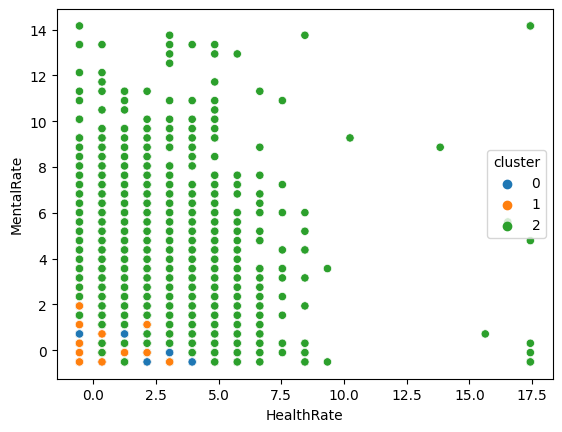

In [ ]:
sns.scatterplot(x='HealthRate', y='MentalRate', hue='cluster', data=frame);
plt.show()

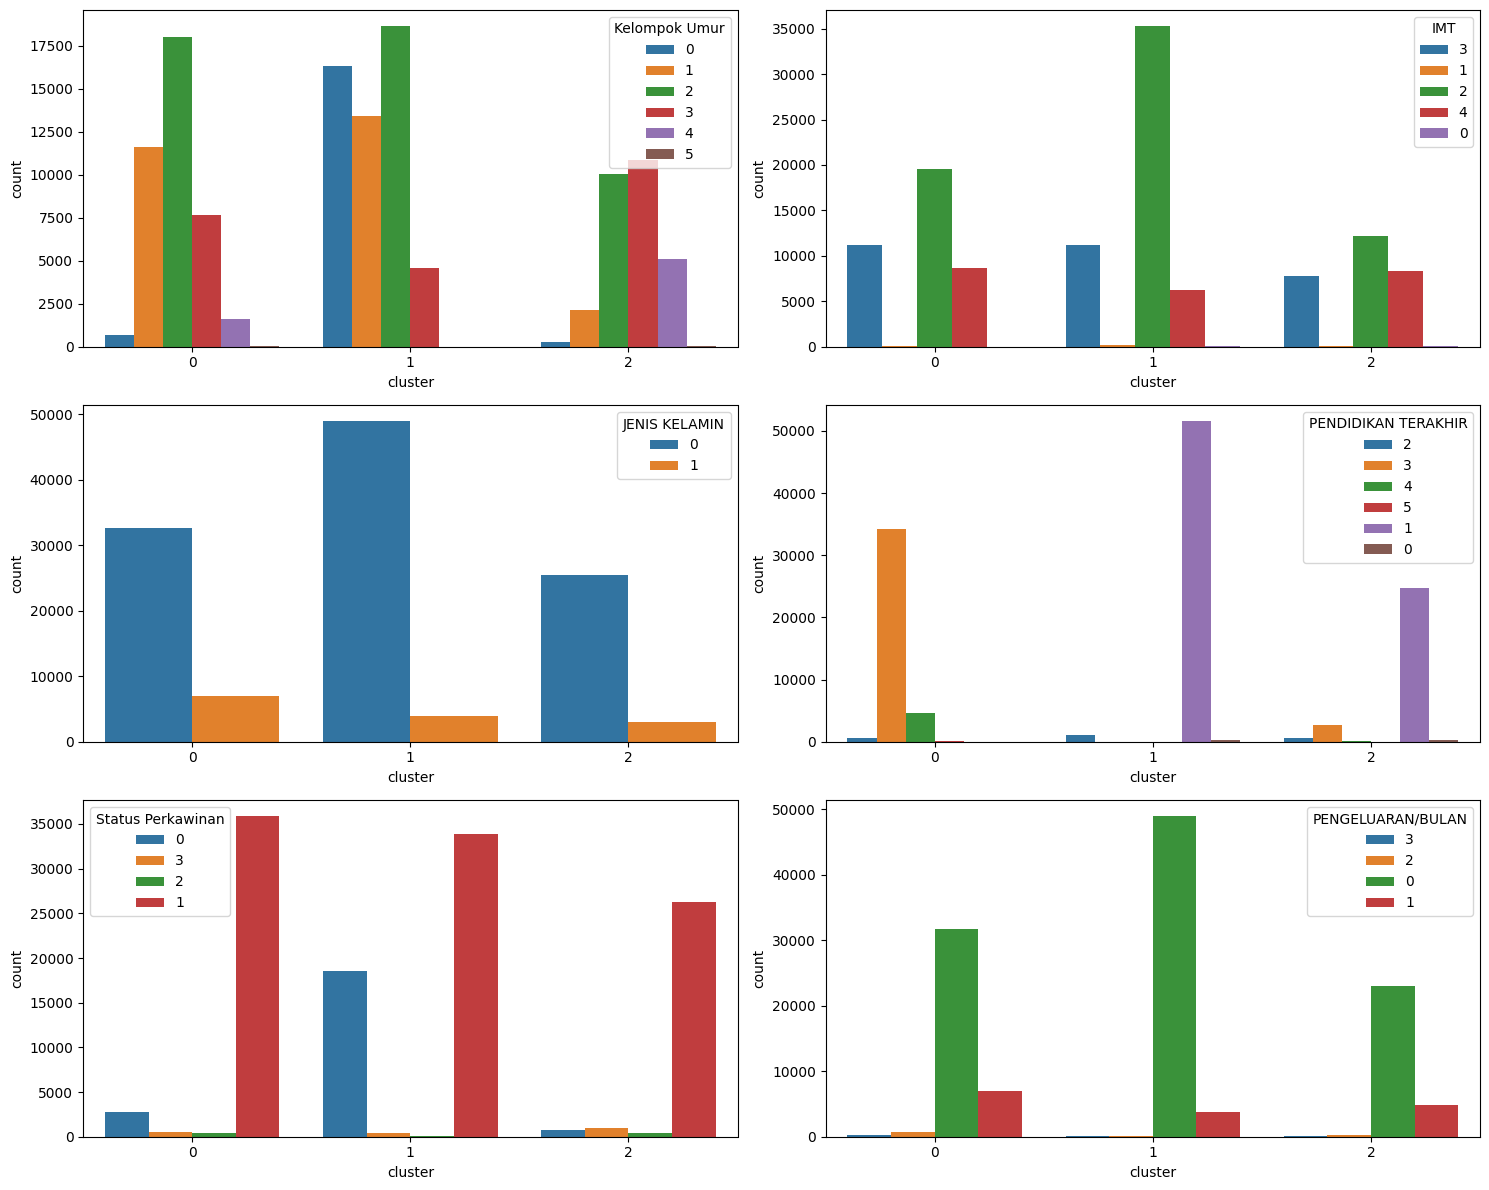

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

cols = ['Kelompok Umur', 'IMT', 'JENIS KELAMIN', 'PENDIDIKAN TERAKHIR', 'Status Perkawinan', 'PENGELUARAN/BULAN']

# Create subplots
fig, axs2 = plt.subplots(3, 2, figsize=(15, 12))  # 3 rows, 2 columns for 6 countplots

# Flatten the axis array for easier iteration
axs2 = axs2.flatten()

# Loop through the columns and plot countplots
for i, col in enumerate(cols):
    sns.countplot(x='cluster', hue=col, data=frame, ax=axs2[i])

# Adjust layout for better visualization
plt.tight_layout()

# Show the plot
plt.show()

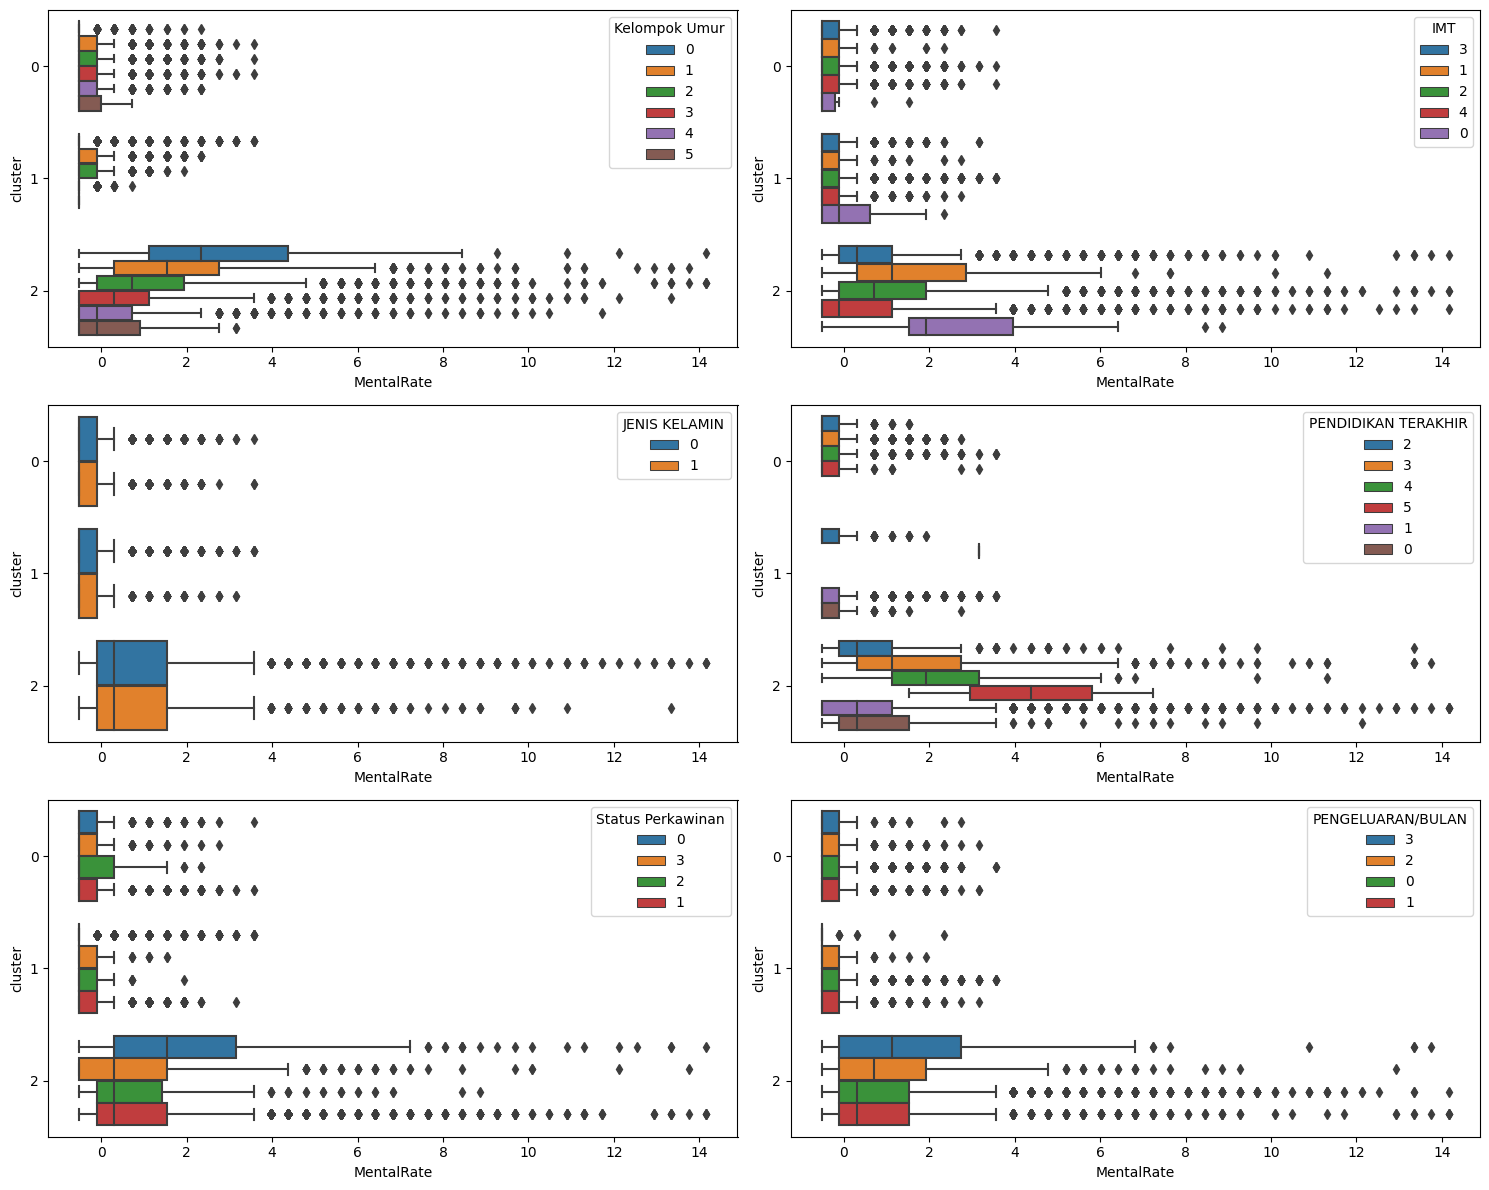

In [ ]:
#Visualisasi Hubungan Mental Rate dan Variabel Kategori di Tiap Cluster
cols = ['Kelompok Umur', 'IMT', 'JENIS KELAMIN', 'PENDIDIKAN TERAKHIR', 'Status Perkawinan', 'PENGELUARAN/BULAN']
fig, axs2 = plt.subplots(3, 2, figsize=(15, 12))  # 3 rows, 2 columns for 6 countplots
axs2 = axs2.flatten()

# Loop through the columns and plot countplots
for i, col in enumerate(cols):
    sns.boxplot(x='MentalRate',y='cluster' , hue=col, data=frame, ax=axs2[i])

plt.tight_layout()
plt.show()

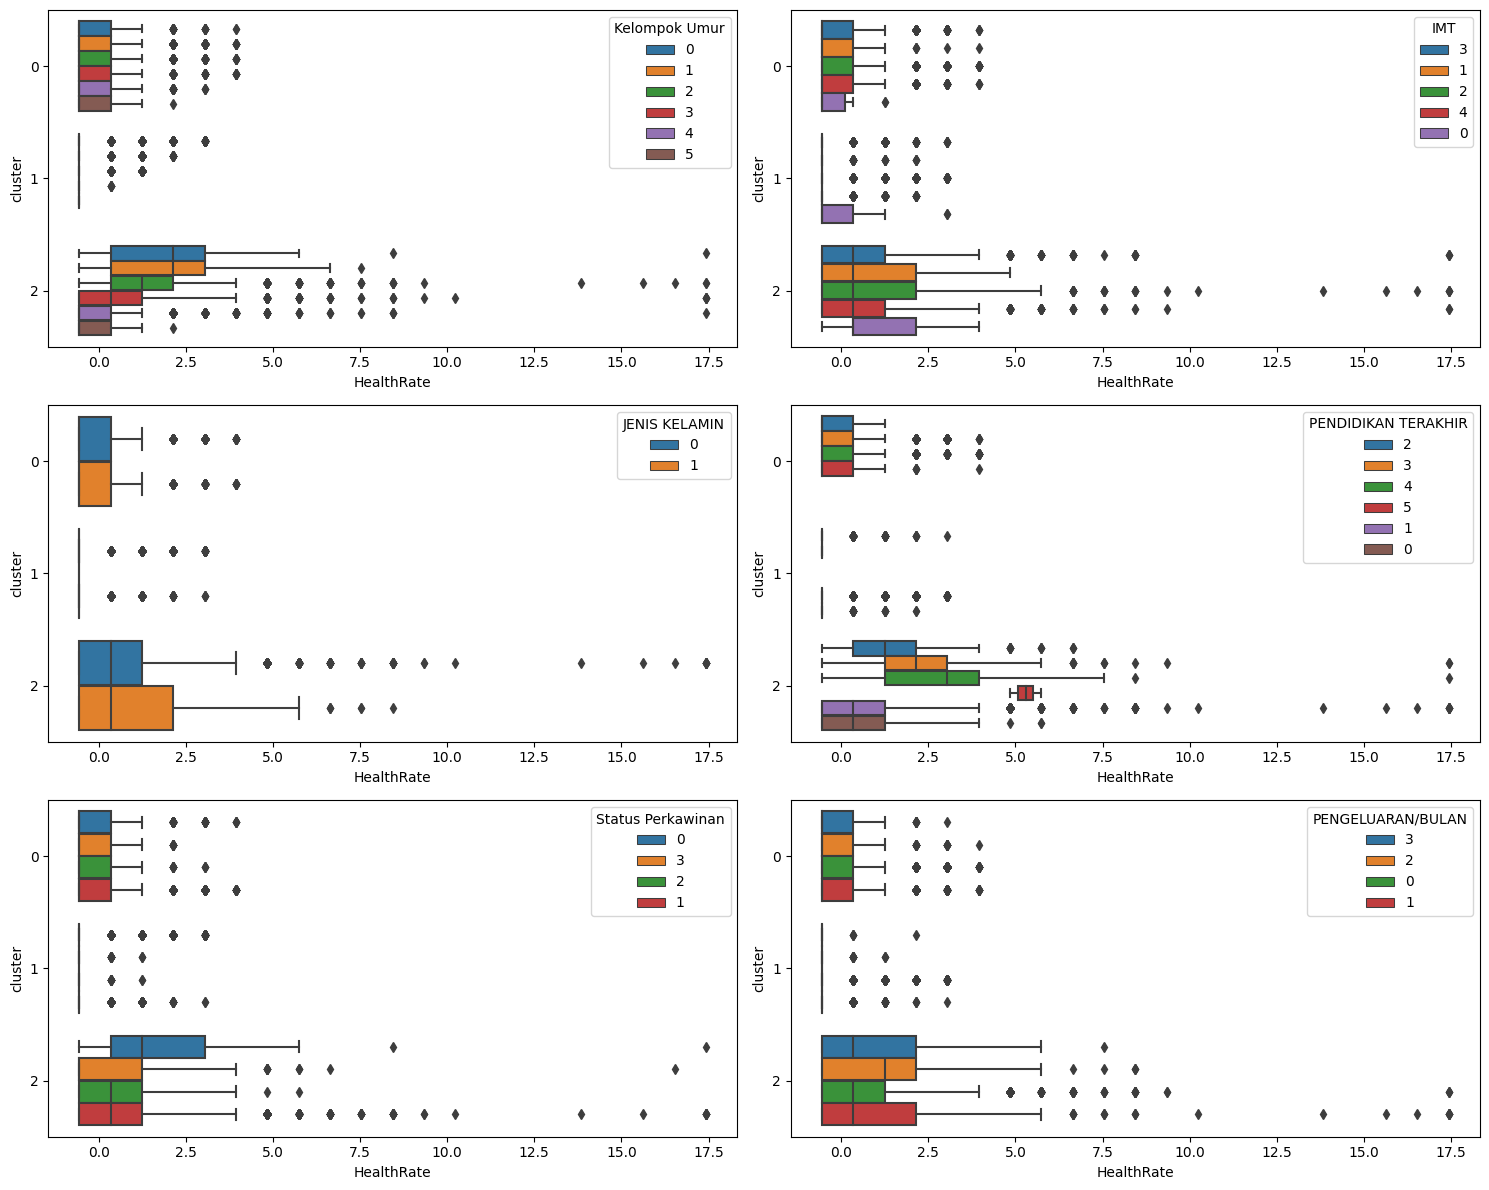

In [ ]:
#Visualisasi Hubungan Health Rate dan Variabel Kategori di Tiap Cluster
cols = ['Kelompok Umur', 'IMT', 'JENIS KELAMIN', 'PENDIDIKAN TERAKHIR', 'Status Perkawinan', 'PENGELUARAN/BULAN']
fig, axs2 = plt.subplots(3, 2, figsize=(15, 12))  # 3 rows, 2 columns for 6 countplots
axs2 = axs2.flatten()

# Loop through the columns and plot countplots
for i, col in enumerate(cols):
    sns.boxplot(x='HealthRate',y='cluster' , hue=col, data=frame, ax=axs2[i])

plt.tight_layout()
plt.show()

###Insight

####Kecenderungan antara Jenis Kelamin, Kategori BMI, dan Berat Badan

In [ ]:
# Create new DataFrame to make easier visualisation
df_a = data[['Kelompok Umur', 'IMT']].copy()
# Adding Mental Score Variable to DataFrame
df_a['Mental Score'] = kualitas_mental

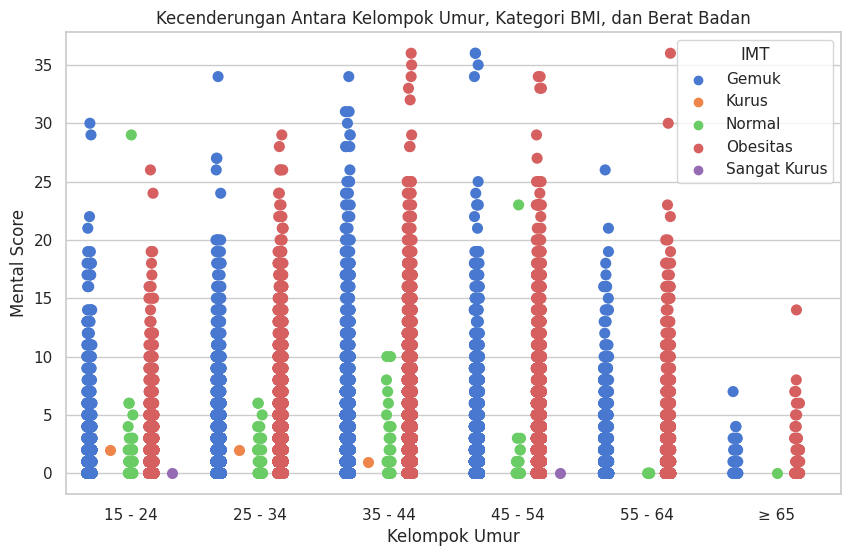

In [ ]:
# Visualisasi menggunakan seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Stripplot untuk memvisualisasikan kecenderungan antara jenis kelamin, kategori BMI, dan berat badan
sns.stripplot(x='Kelompok Umur', y='Mental Score', hue='IMT', data=df_a, palette='muted', dodge=True, size=8)
plt.title('Kecenderungan Antara Kelompok Umur, Kategori BMI, dan Berat Badan')
plt.show()

Dapat dilihat bahwa, pada semua kelompok umur kategori BMI yang paling banyak ada pada kategori obesitas dan gemuk. Lalu, pada 2 kategori itu terlihat bahwa mental score tersebar dari 0-35+. Di sini, juga dapat dilihat bahwa kategori kurus dan sangat kurus pada semua kelompok umur memiliki mental score yang rendah mengindikasikan mental health yang baik. Untuk kategori normal juga memiliki mental score yang cenderung rendah mengindikasikan mental health yang baik.

####Hubungan Jenis Kelamin dan Kelompok Umur dengan Tingkat Stress

In [ ]:
# Create new DataFrame to make easier visualisation
dp = data[['Kelompok Umur','JENIS KELAMIN']].copy()
# Adding Mental Score Variable to DataFrame
dp['Mental Score'] = kualitas_mental

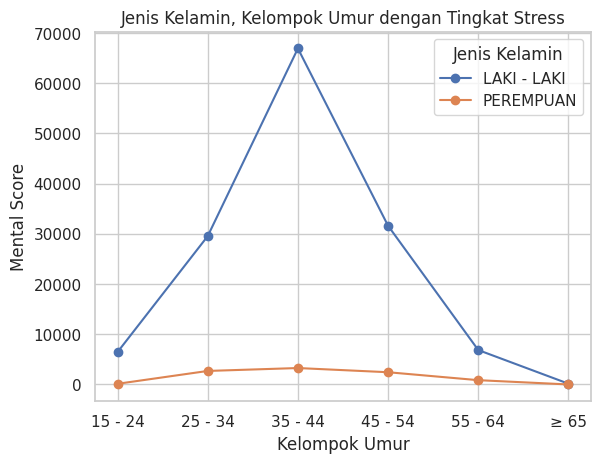

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Membuat tabel kontingensi
contingency_table = pd.crosstab(dp['Kelompok Umur'],dp["JENIS KELAMIN"], values=dp['Mental Score'], aggfunc='sum', margins=True, margins_name='Total')

# Visualisasi dengan plot garis
contingency_table = contingency_table.iloc[:-1, :-1]
# Menyusun data untuk plot garis
x = range(len(contingency_table.index))
for i, col in enumerate(contingency_table.columns):
    plt.plot(x, contingency_table[col], label=col, linestyle='-', marker='o')

plt.title('Jenis Kelamin, Kelompok Umur dengan Tingkat Stress')
plt.xlabel('Kelompok Umur')
plt.ylabel('Mental Score')
plt.xticks(x, contingency_table.index)
plt.legend(title='Jenis Kelamin', bbox_to_anchor=(1, 1))

plt.show()


Pada plot di atas dapat dilihat bahwa, jenis kelamin laki-laki dan perempuan memiliki tingkat stress pada kelompok umur 35-44.

####Hubungan Jumlah Rokok dan Jenis Kelamin dengan Tingkat Stress

In [ ]:
# Create new DataFrame to make easier visualisation
data_kondisi['Jenis Kelamin']=data['JENIS KELAMIN']
dr = data_kondisi[['jumlahrokok','Jenis Kelamin']].copy()
# Adding Mental Score Variable to DataFrame
dr['Mental Score'] = kualitas_mental

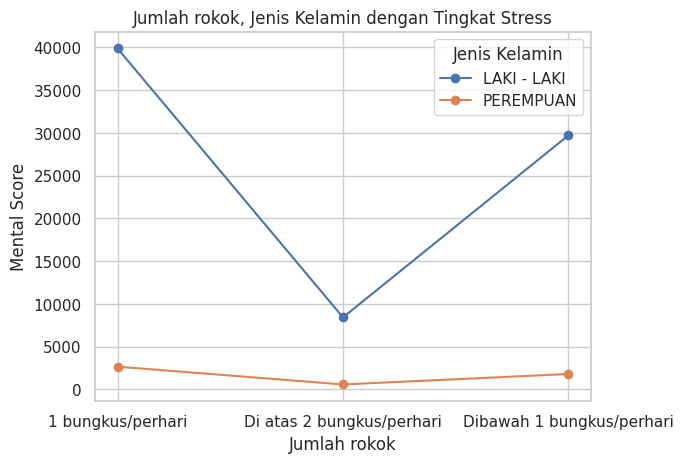

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Membuat tabel kontingensi
contingency_table = pd.crosstab(dr['jumlahrokok'],dr["Jenis Kelamin"], values=dp['Mental Score'], aggfunc='sum', margins=True, margins_name='Total')

# Visualisasi dengan plot garis
contingency_table = contingency_table.iloc[:-1, :-1]
# Menyusun data untuk plot garis
x = range(len(contingency_table.index))
for i, col in enumerate(contingency_table.columns):
    plt.plot(x, contingency_table[col], label=col, linestyle='-', marker='o')

plt.title('Jumlah rokok, Jenis Kelamin dengan Tingkat Stress')
plt.xlabel('Jumlah rokok')
plt.ylabel('Mental Score')
plt.xticks(x, contingency_table.index)
plt.legend(title='Jenis Kelamin', bbox_to_anchor=(1, 1))

plt.show()


Pada plot di atas, dapat dilihat bahwa kategori orang yang merokok 1 bungkus/hari dan < 1 bungkus/hari memiliki tingakt stres yang cukup tinggi dan lebih tinggi daripada kategori merokok > 2 bungkus/hari.